# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, fbeta_score, make_scorer

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
original = pd.read_csv("/content/drive/MyDrive/DS&BA @ UTA/Module 4/DataSets/INNHotelsGroup.csv")

In [ ]:
# creating copy of original df
data = original.copy()

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

- Data was uploaded successfully.
- We will further delete the Booking ID column because it contains unique values and will not give any information about cancellations. 


In [ ]:
data.shape

(36275, 19)

- There are 36475 rows and 19 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- There are 5 object columns (Booking_ID, type_of_meal, room_type, market_type, and booking_status), and the rest are numeric.

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in the df.

In [ ]:
data.duplicated().sum()

0

-

 There are no duplicated values in the df.

In [ ]:
data.Booking_ID.nunique()

36275

- There are 36,275 unique values in the Booking ID column

In [ ]:
# dropping Booking_ID
data = data.drop(["Booking_ID"], axis=1)

In [ ]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

- Most reservations contain 2 adults.
- Children in reservations range from 0  to 10.
- People tend to stay more night during week days.
- The average time between reservation date and arrival day is 85 days.
- Data provided is from 2017 and 2018.
- Most guests are new.
- Max number of times a guest has cancelled is 13.
- Max number of times a guest has perviously not cancelled is 58.
- The min avg. price per room ranges from 0 and 540, which seems weird. Will need further analysis.


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
  - **R:** People tend to book hotel reservations more often during the months of August(10.5%), September(12.7%) and October(14.7%), but the months with the most visits (busiest months) are October, followed by September and then December.

2. Which market segment do most of the guests come from?
  - **R:** 64% of reservations come from online clients, followed by 29% coming from walk-ins, 5.6% corresponding to corporate, 1.1% are complementary, and 0.3% from aviation crew.
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
  - **R:** Prices for customers who book online tend to be higher, with a mean price of around 112 euros per room. Aviation customers follow on second place with a mean price of around 100 euros, and offline customers with a mean of 91 euros per room.
4. What percentage of bookings are canceled? 
  - **R:** 32.8% of reservations were cancelled.
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
  - **R:** There are a total of 930 repeated guests, from which only 16 (~1.7%) cancelled.
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
  - **R:** There isn't enough data to accurately compare the number of special requests and their cancellation rates, but based on the gathered information there is a tendency of higher probability of cancellation the less the special requirements.





In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
        
plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))

    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )
    
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    
    plt.tight_layout()
    plt.show()

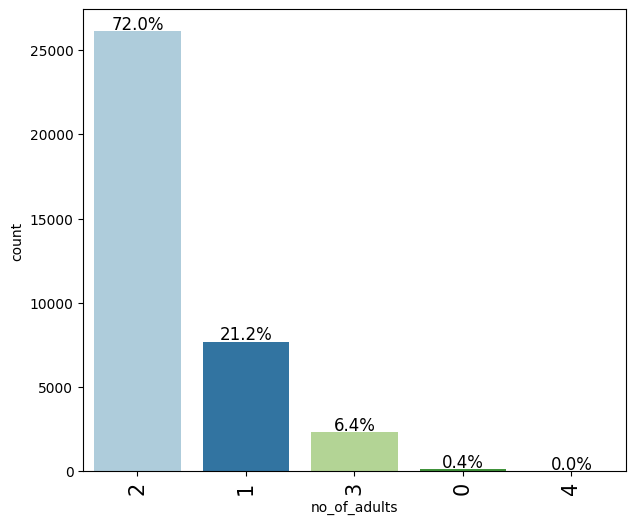

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

- 72% of reservations had 2 adults, 21.2% had 1 adult, and 6.4% had 3.
- There's a couple of reservations that seem to only had children.

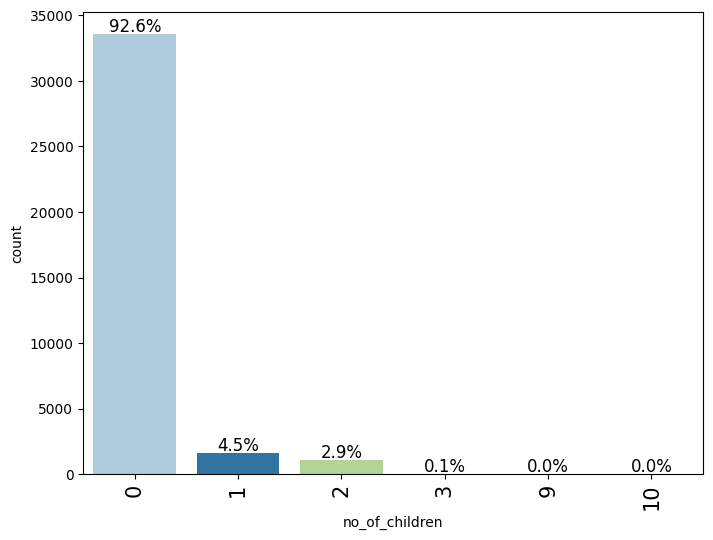

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

- 92.6% of reservations had 0 children, 4.5% had 1 child, and 2.9% had 2.

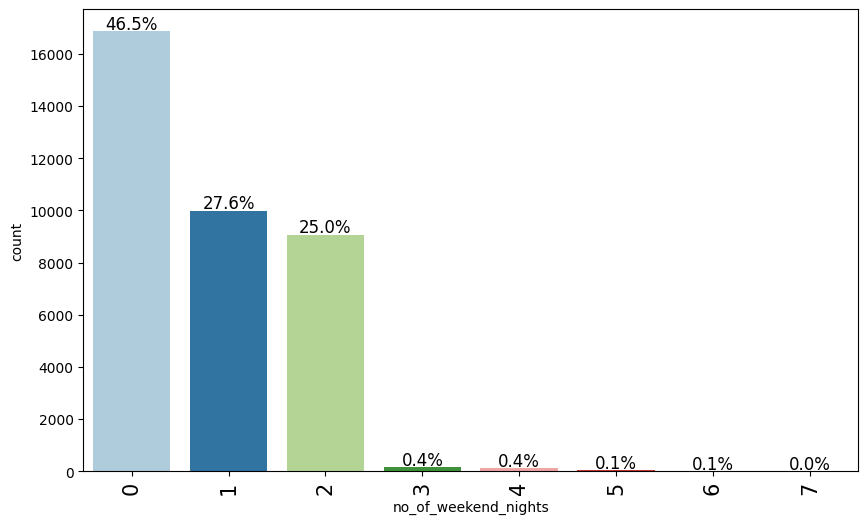

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

- 46.5% of reservations were made only during week days.
- 27.6% of resevations spent only one night during weekends, and 25% spent 2 weekend nights.
- Theres a couple of reservations that spent between 3 and 6 weekend nights.

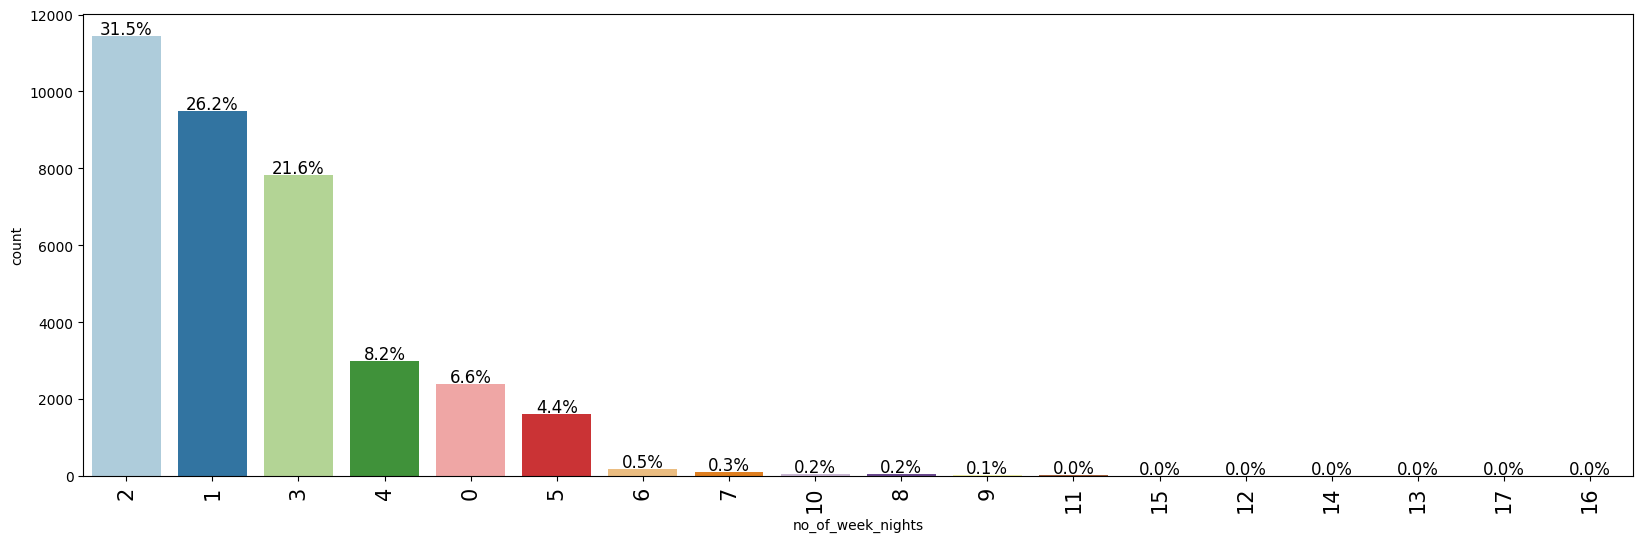

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

- 79.3% of reservations are made for between 1 and 3 week nights.
- 6.6% of reservations are only made for weekend stays.
- 12.6% of reservations are made for between 4 and 5 week nights.



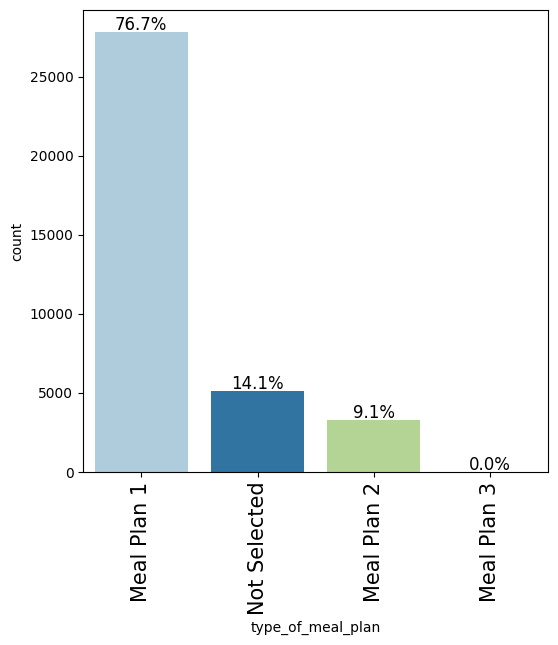

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

- 76.7% of reservations included breakfast only, 14.1% did't select a meal plan, and 9.1% included breakfast and another meal.

- Just a couple of reservations included 3 meals a day. 

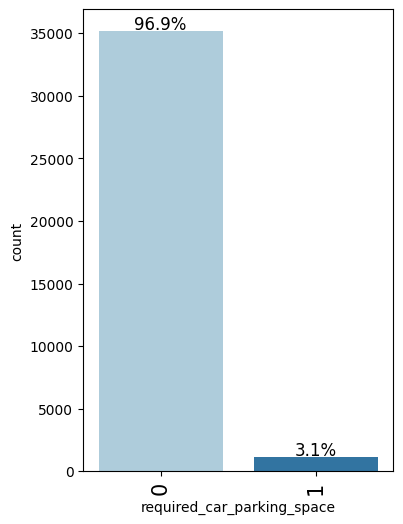

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

- 96.9% of resevations didn't require a parking spot, and only 3.1% needed only 1.

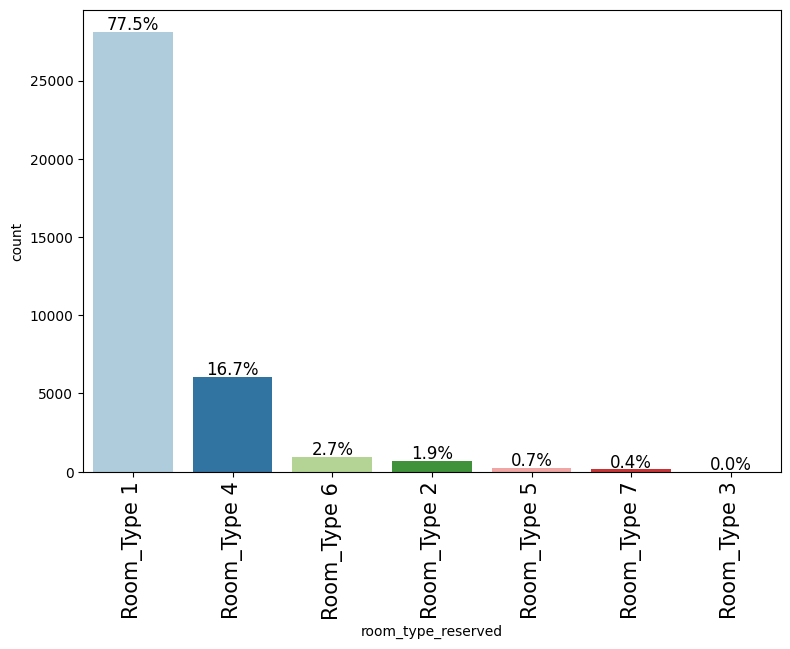

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

- 77.5% of clients reserved type 1 rooms, 16.7% reserved type 4 rooms.
- 4.6% of reservations occupy type 6 or 2 rooms.
- Type 6, and 2 rooms are reseerved by 4.6% of clients.
- Type 5, 7 and 3 rooms are reseved by only 1.1% of cliets. 

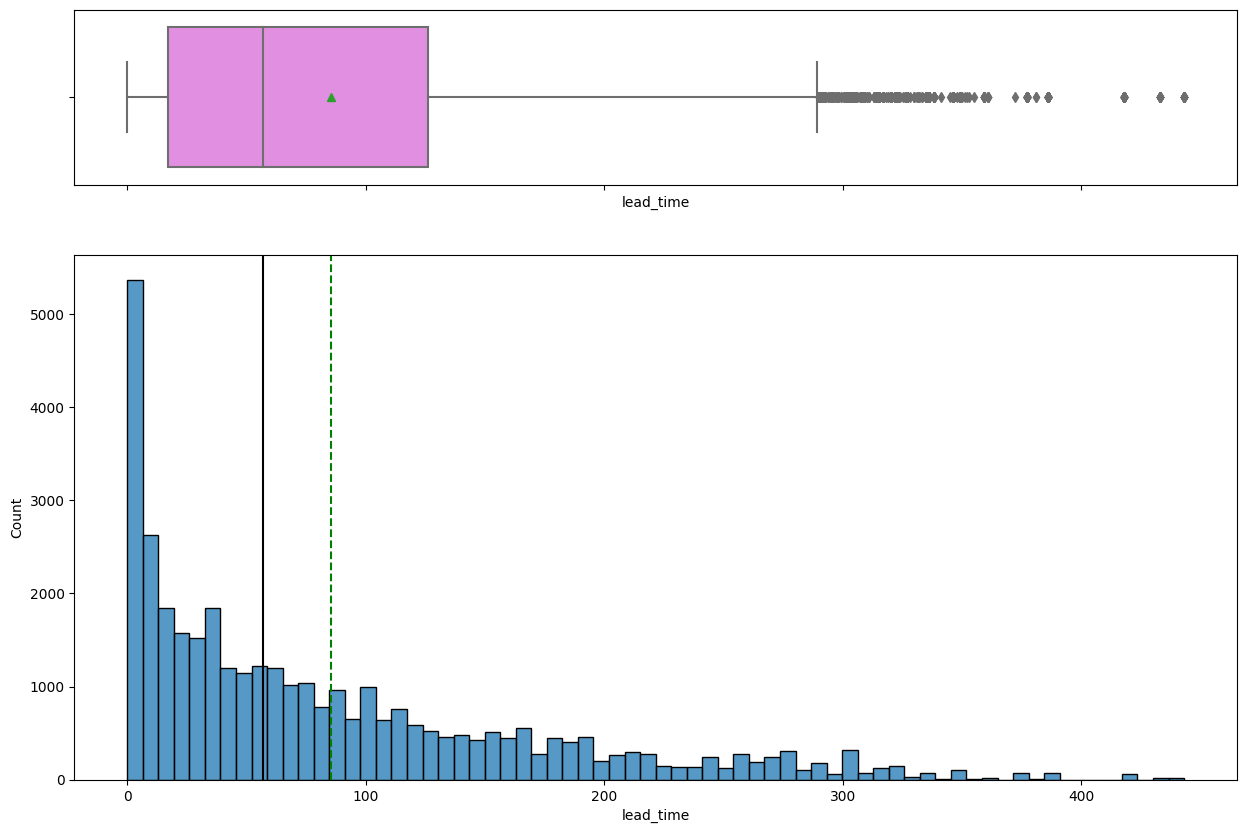

In [ ]:
histogram_boxplot(data, "lead_time")

- The distribution is right-skewed with a lot of outliers.
- The median lead time is around 60 days, and the mean lead time is around 90 days.


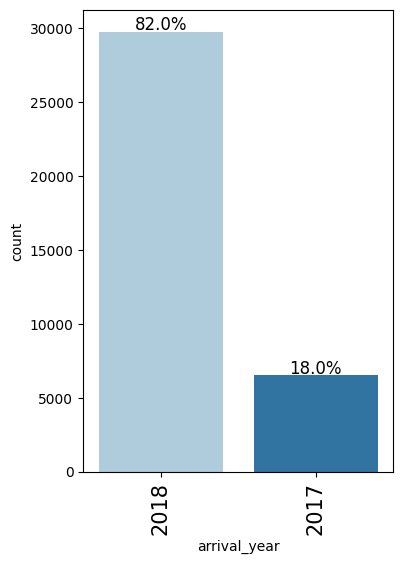

In [ ]:
labeled_barplot(data, "arrival_year", perc=True)

- 82% of reservations were made on 2018, while the remaining 18% come from 2017.

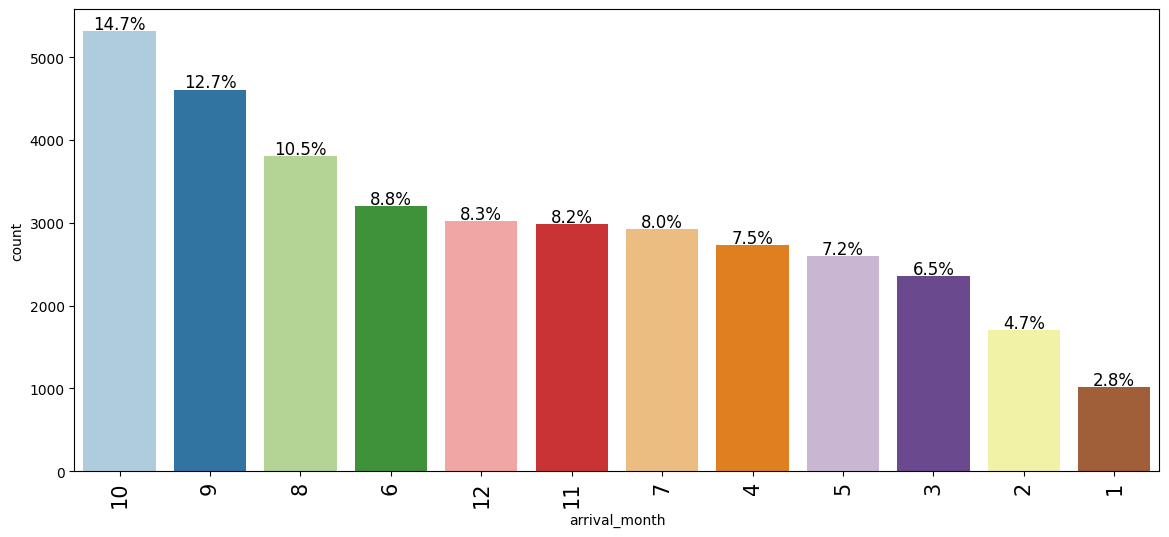

In [ ]:
labeled_barplot(data, "arrival_month", perc=True)

- People tend to book hotel reservations more often during the months of August(10.5%), September(12.7%) and October(14.7%), but the months with the most visits (busiest months) are October, followed by September and then December.
- January and February are the least occupied months of the year, with 2.8% and 4.7% of reservations made during these months respectively.

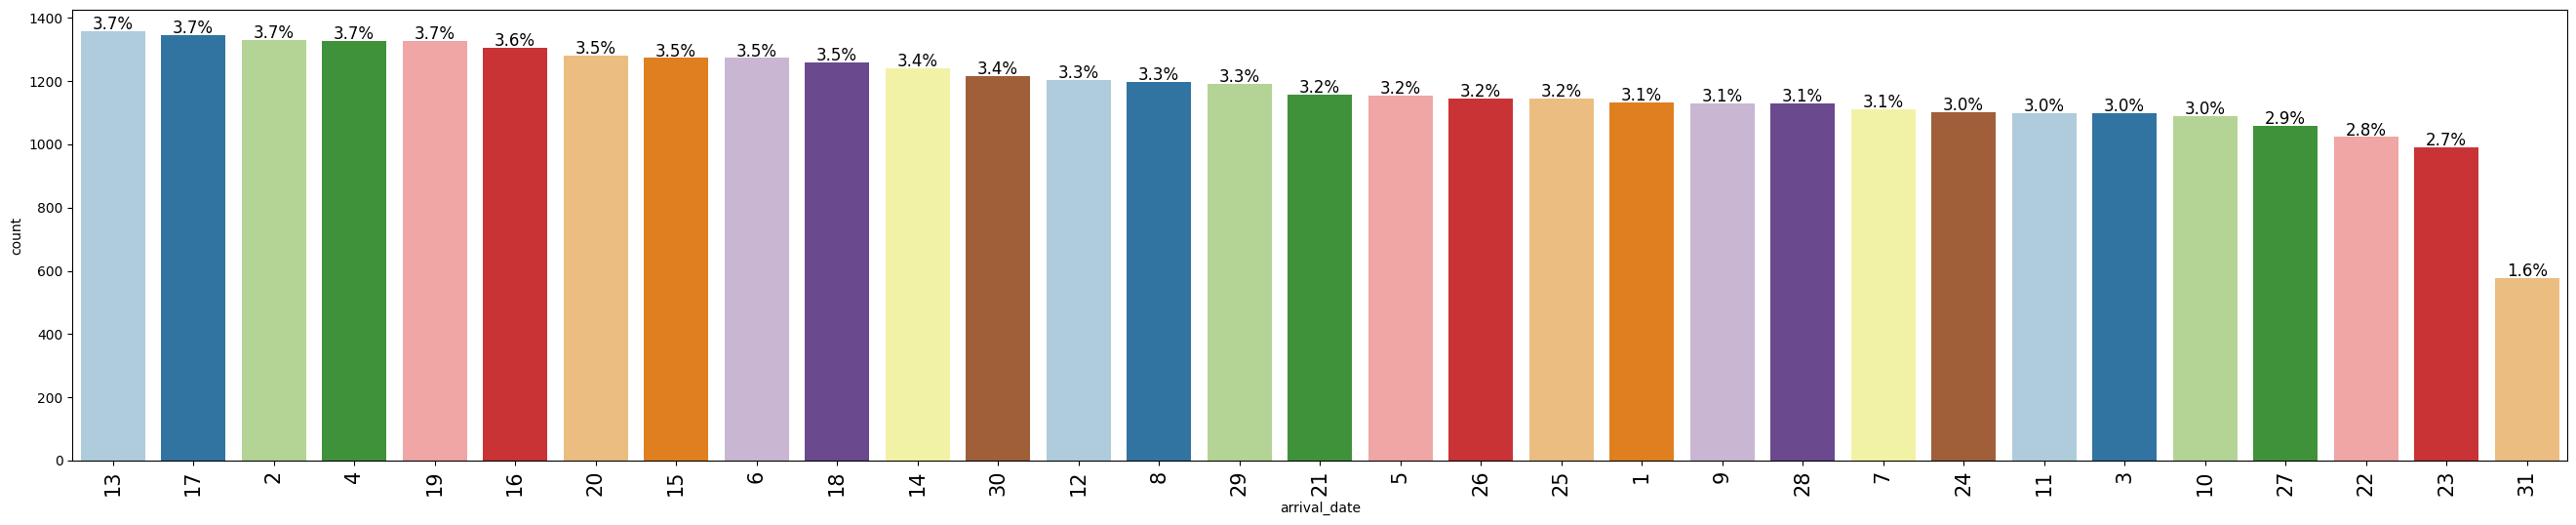

In [ ]:
labeled_barplot(data, "arrival_date", perc=True)

- Reservation dates through out the days of the month seem pretty consistent, apart from the 31st which is understandable because it isn't present in every month.
- There is no specific set of days that seem to be considerably more popular.

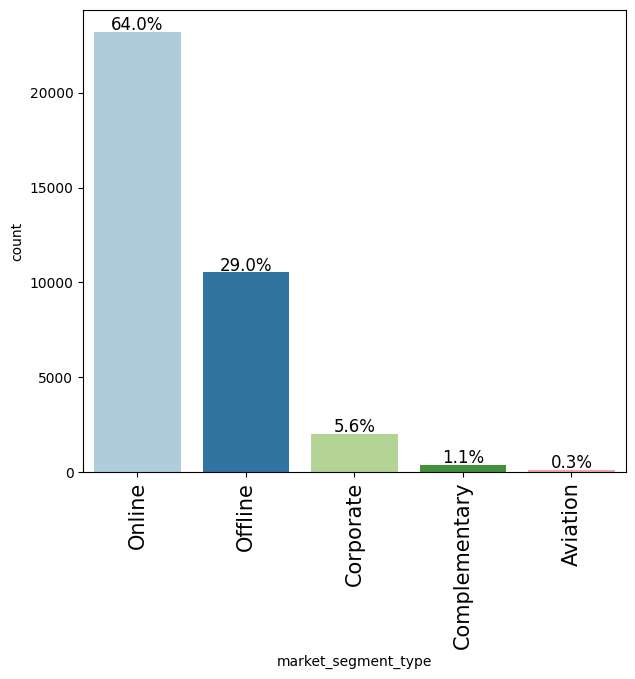

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

- 64% of reservations come from online clients, followed by 29% coming from walk-ins, 5.6% corresponding to corporate, 1.1% are complementary, and 0.3% from aviation crew.

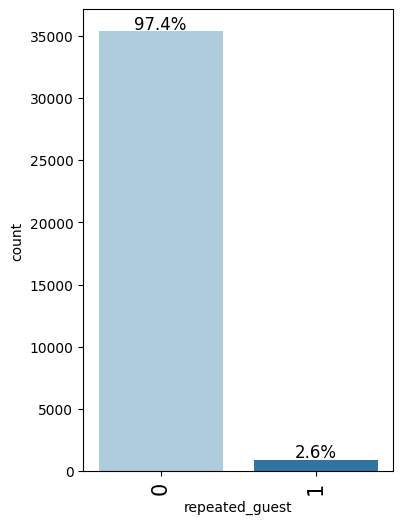

In [ ]:
labeled_barplot(data, "repeated_guest", perc=True)

- Only 2.6% of reservations ccame from repeated guests.

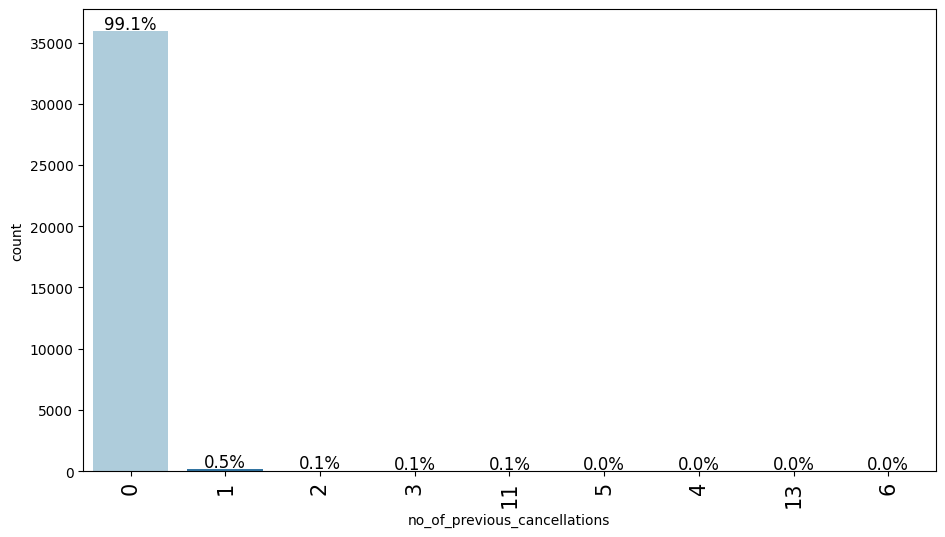

In [ ]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

- Only 0.9% of clients had a history of previous cancellations, ranging from 1 to 13 cancellations.

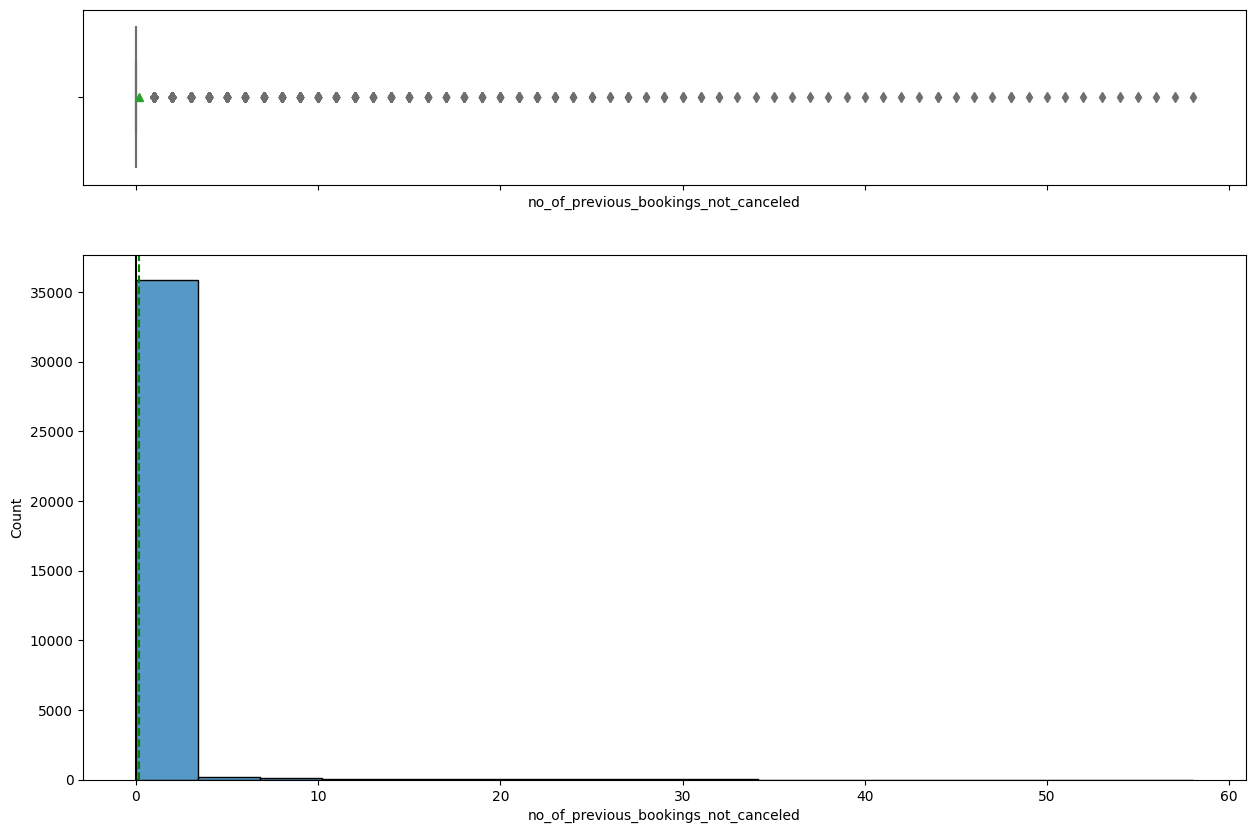

In [ ]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

- There are a lot of outliers to the right of the distribution.
- Most customers don't have a history of previous cancellations.

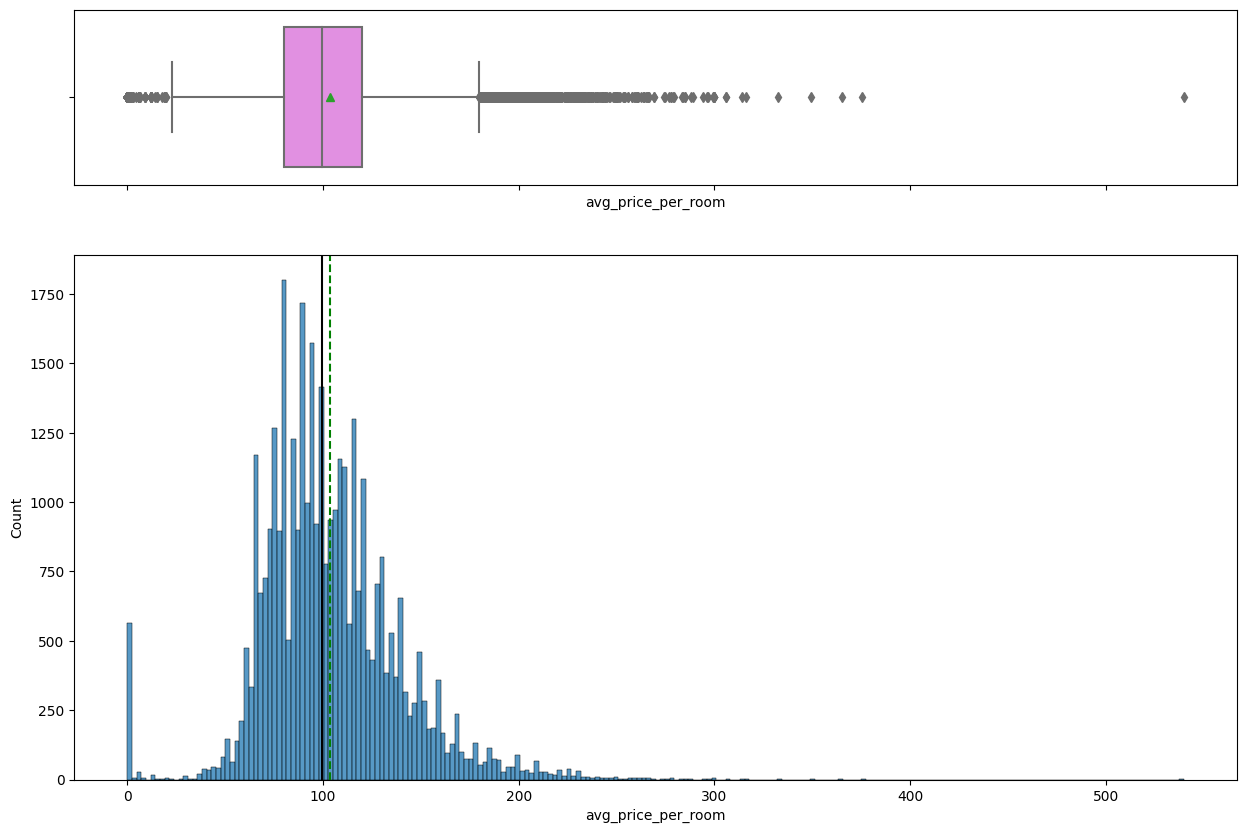

In [ ]:
histogram_boxplot(data, "avg_price_per_room")

- The distribution is right skewed with a lot of outliers on both sides.
- The average price per room through out the months is a little bit more than 100 euros.
- Most reservation prices fall between around 70 and 120 euros.
- There's around 550 reservations that averaged 0 euro, which seems odd.


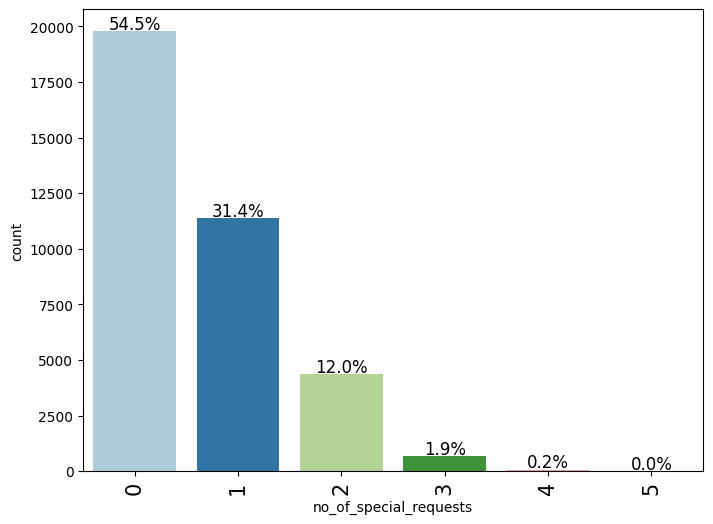

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

- A little more than half of the reservations didn't ask for special requests.
- Around a third of them asked for one special request, and 14.1% asked for 2 or more special requests.

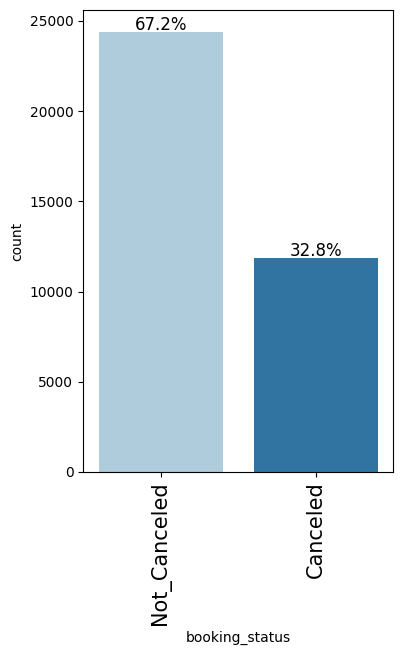

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

- 32.8% of reservations were cancelled.

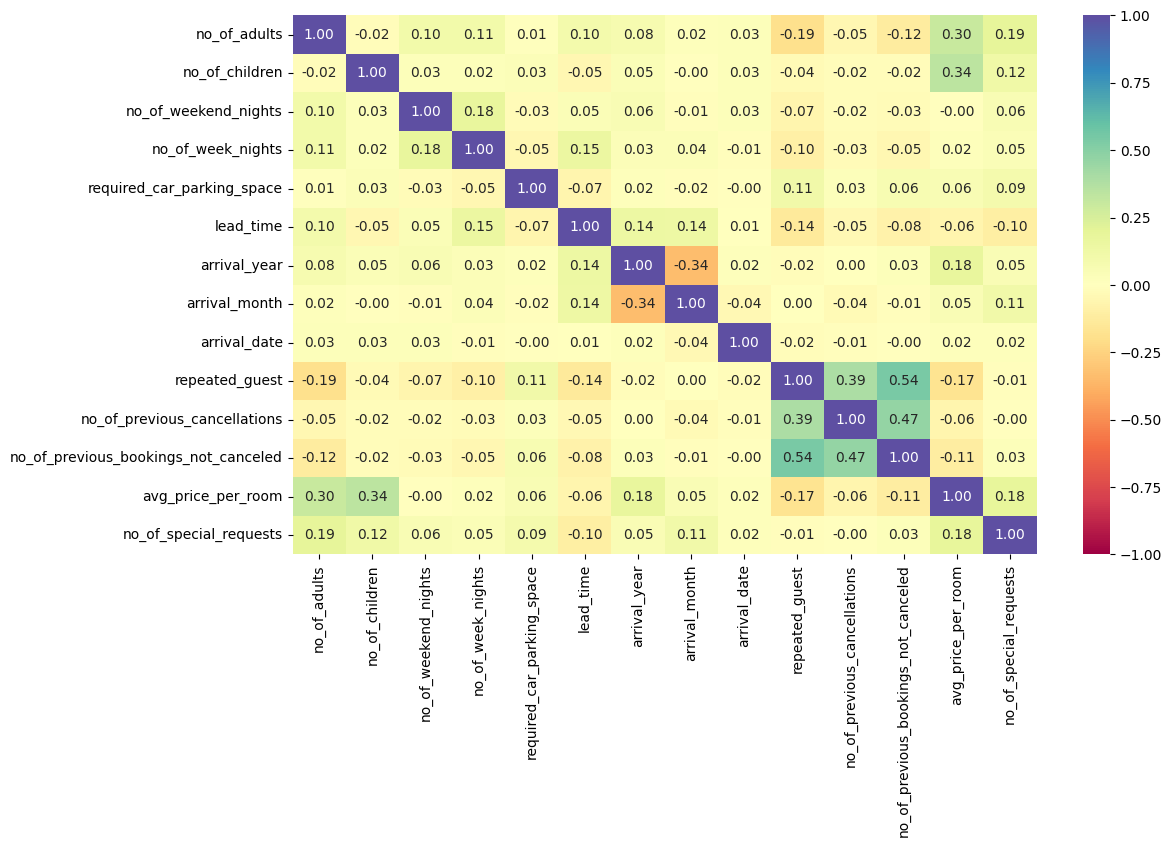

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Repeated guests is somewhat correlated to number of previous bookings not cancelled.
- There aren't any other strong correlations.

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


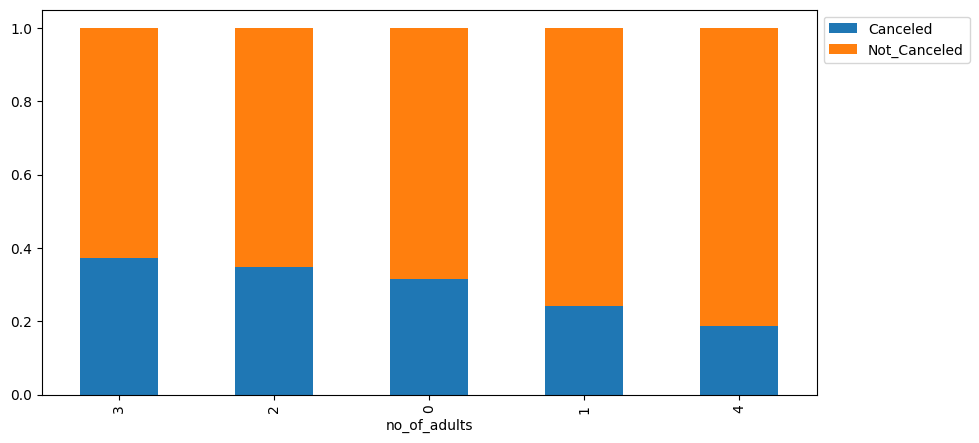

In [ ]:
 stacked_barplot(data, "no_of_adults", "booking_status")

- Reservations with between 2 and 3 adults tend to have a higher chance of cancellation; almost 40%.
- Reservations with 4 adutls have the lowest rate of cancellation (around 20%).

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


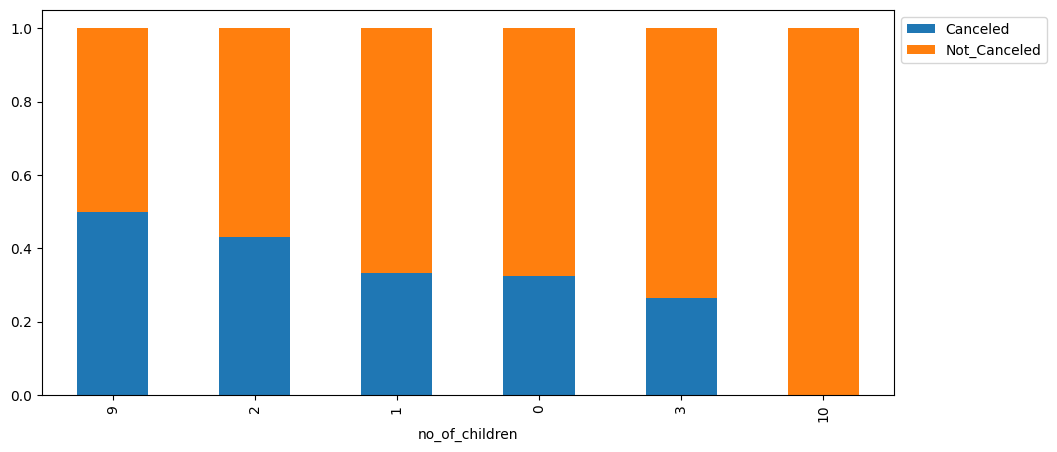

In [ ]:
 stacked_barplot(data, "no_of_children", "booking_status")

- There's not enough reservations with 9 or 10 kids for us to make an accurate assumption.
- Those reservations with 2 kids have the highest rate of cancellation (around 40%) compared to those with 1 or 0 kids. 

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


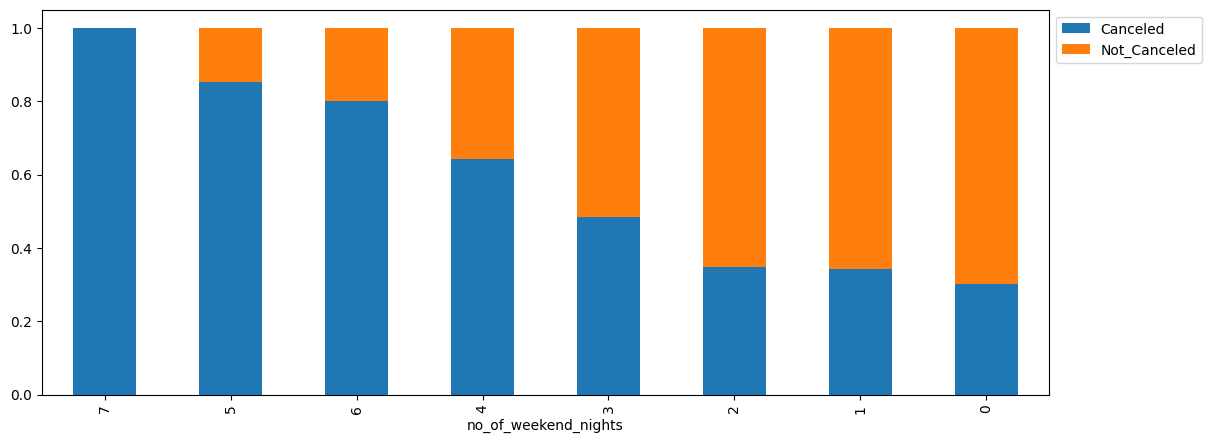

In [ ]:
 stacked_barplot(data, "no_of_weekend_nights", "booking_status")

- As the number of weekend nights increases, so does the posibility of cancellation.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

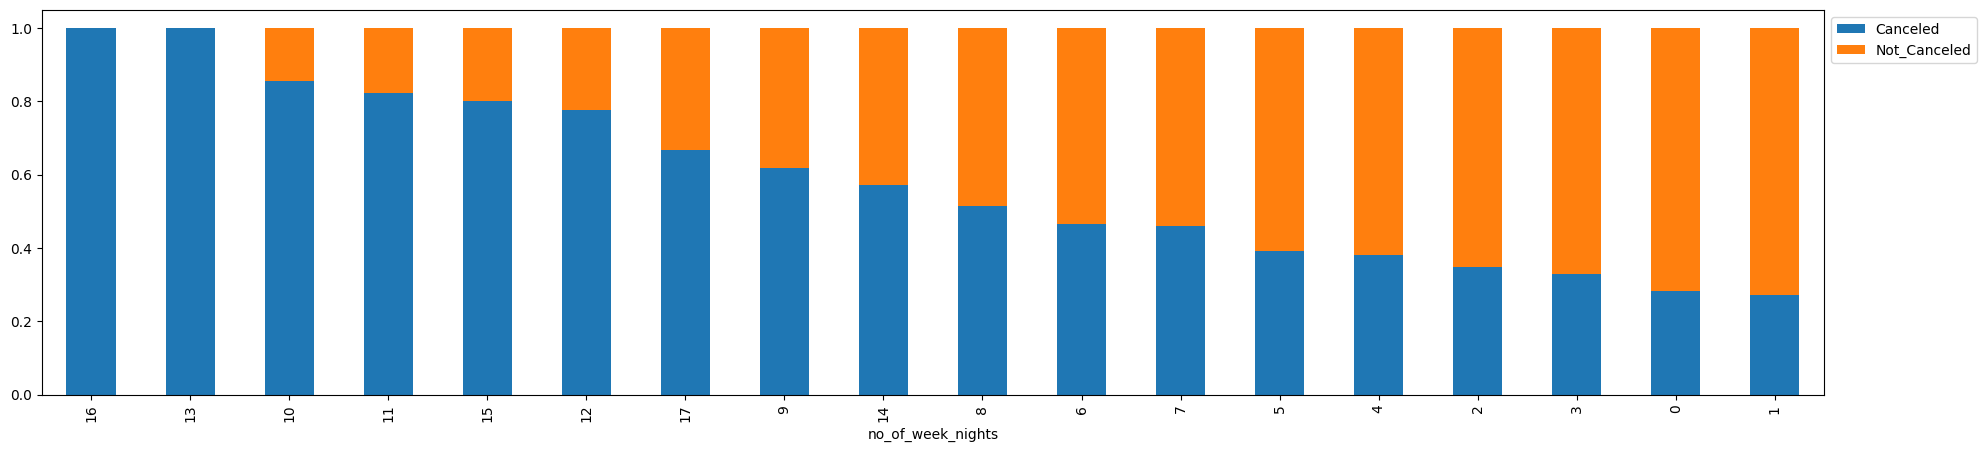

In [ ]:
 stacked_barplot(data, "no_of_week_nights", "booking_status")

- There is an overall tendency of cancellation rates getting higher as the number of week nights increases.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


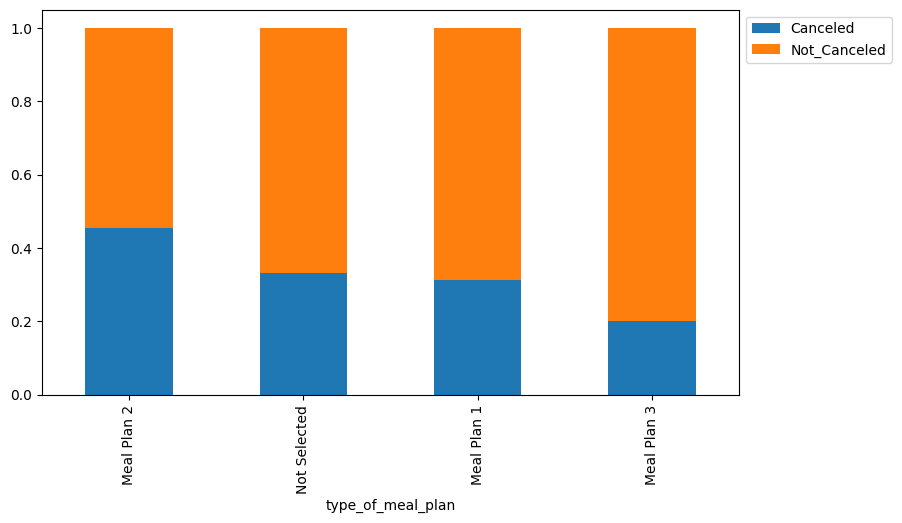

In [ ]:
 stacked_barplot(data, "type_of_meal_plan", "booking_status")

- Reservations with meal plan 2 have the highest tendency of cancellation (~45%).

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


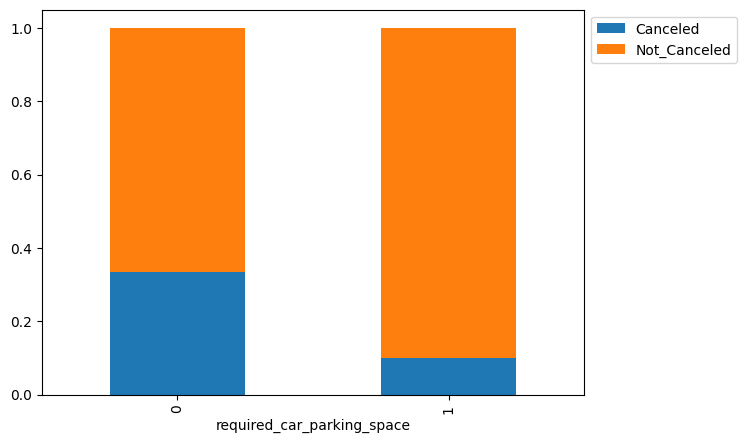

In [ ]:
 stacked_barplot(data, "required_car_parking_space", "booking_status")

- Reservations with one parking spot are considerably less likely to get cancelled.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


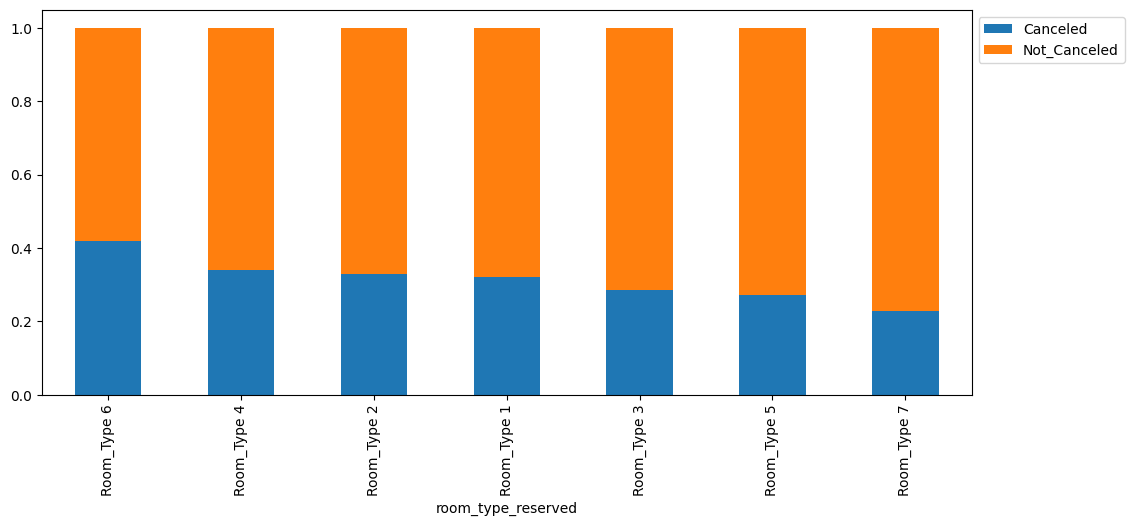

In [ ]:
 stacked_barplot(data, "room_type_reserved", "booking_status")

- Rooms type 6 and 4 are more likely to get cancelled.

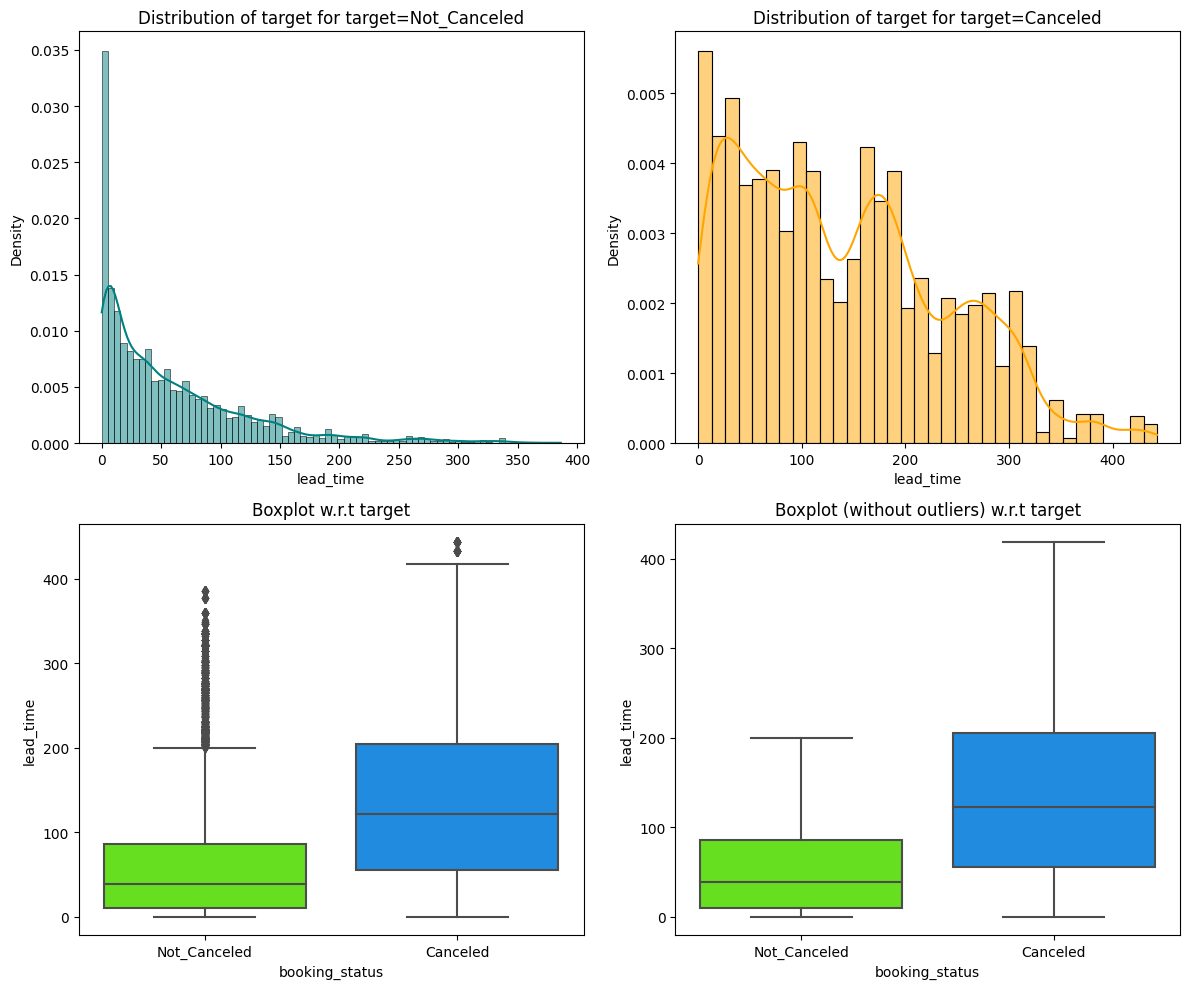

In [ ]:
 distribution_plot_wrt_target(data, "lead_time", "booking_status")

- Reservations with a longer lead time tend to have a higher chance of cancellation, with a median time of around 125 days. The median lead time for reservations that weren't cancelled was around 50 days.

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


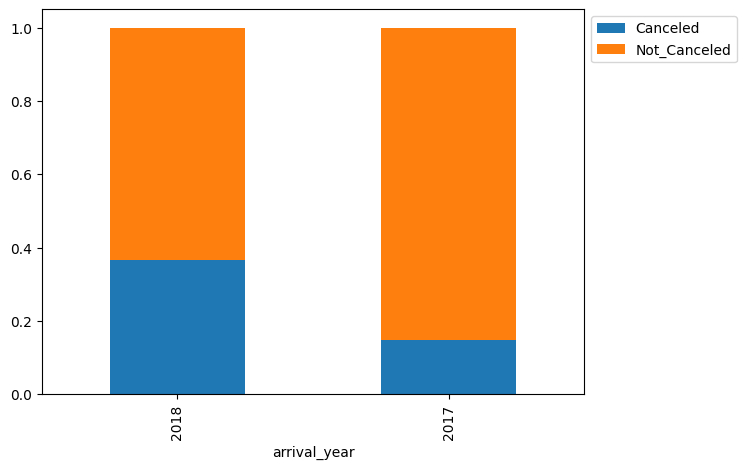

In [ ]:
 stacked_barplot(data, "arrival_year", "booking_status")

- There is some evidence that suggests that in 2018 clients tended to cancel their reservations more often compared to 2017.

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


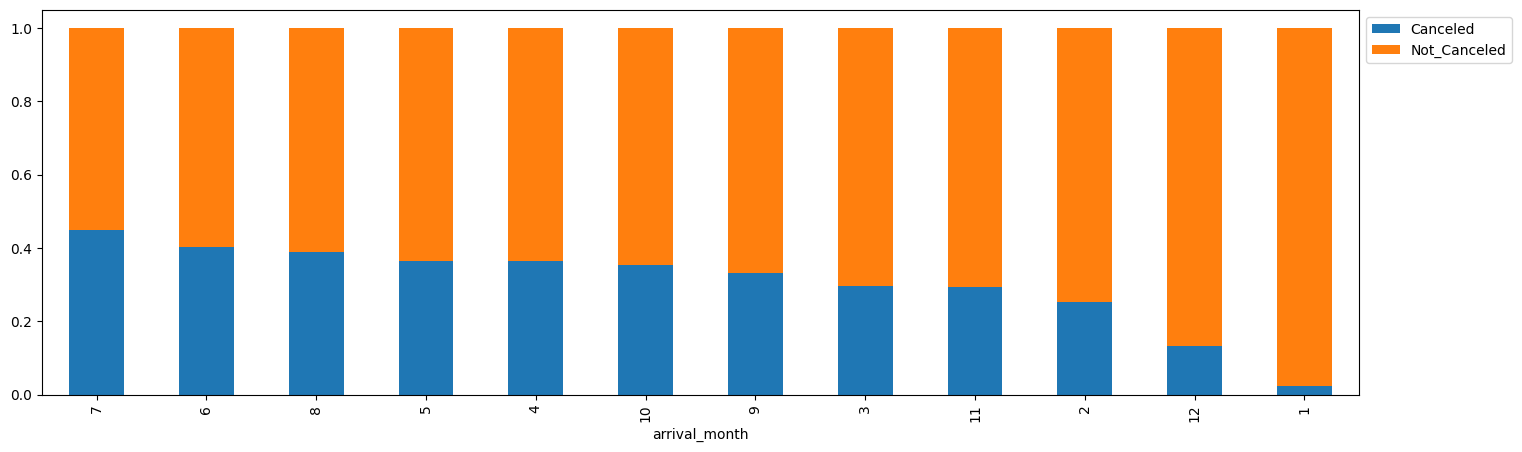

In [ ]:
 stacked_barplot(data, "arrival_month", "booking_status")

- July is the month with the highest rate of cancellations by about 5% apart from June and August.
- October is the busiest month, followed by September and then December.

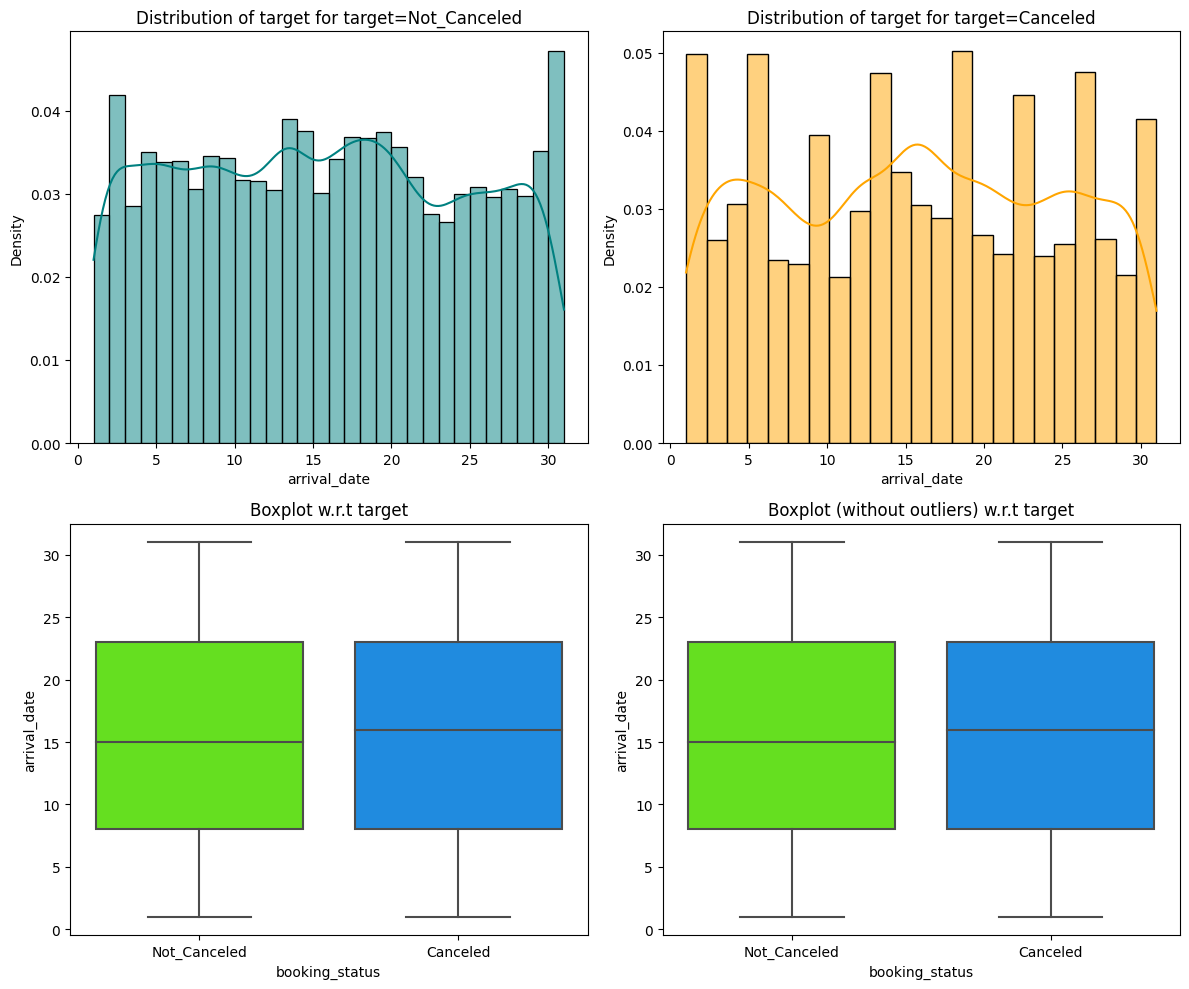

In [ ]:
 distribution_plot_wrt_target(data, "arrival_date", "booking_status")

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


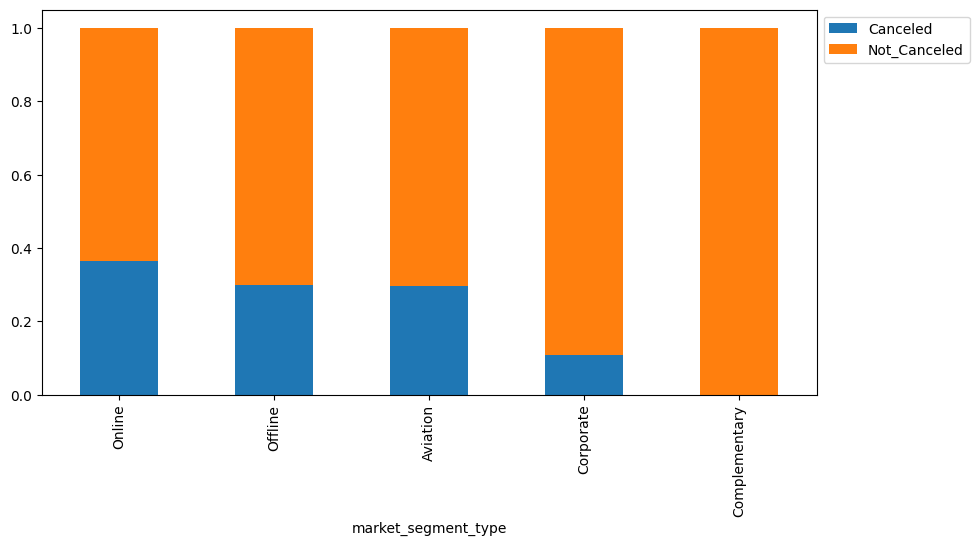

In [ ]:
 stacked_barplot(data, "market_segment_type", "booking_status")

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


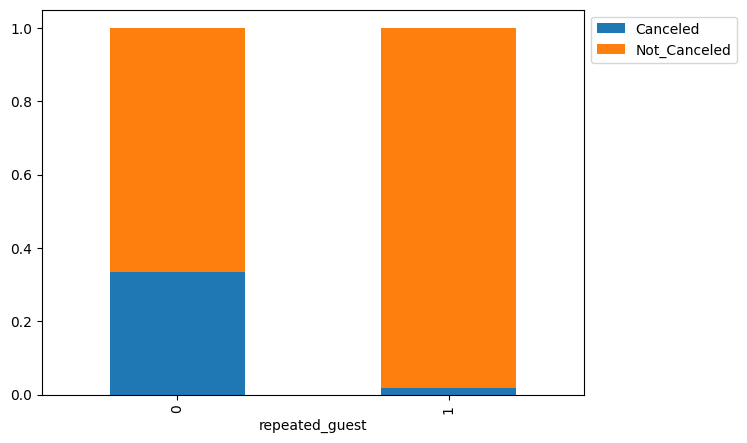

In [ ]:
 stacked_barplot(data, "repeated_guest", "booking_status")

- There are a total of 930 repeated guests, from which only 16 (~1.7%) cancelled.
- Around 35% of reservations coming from new guests were cancelled. 

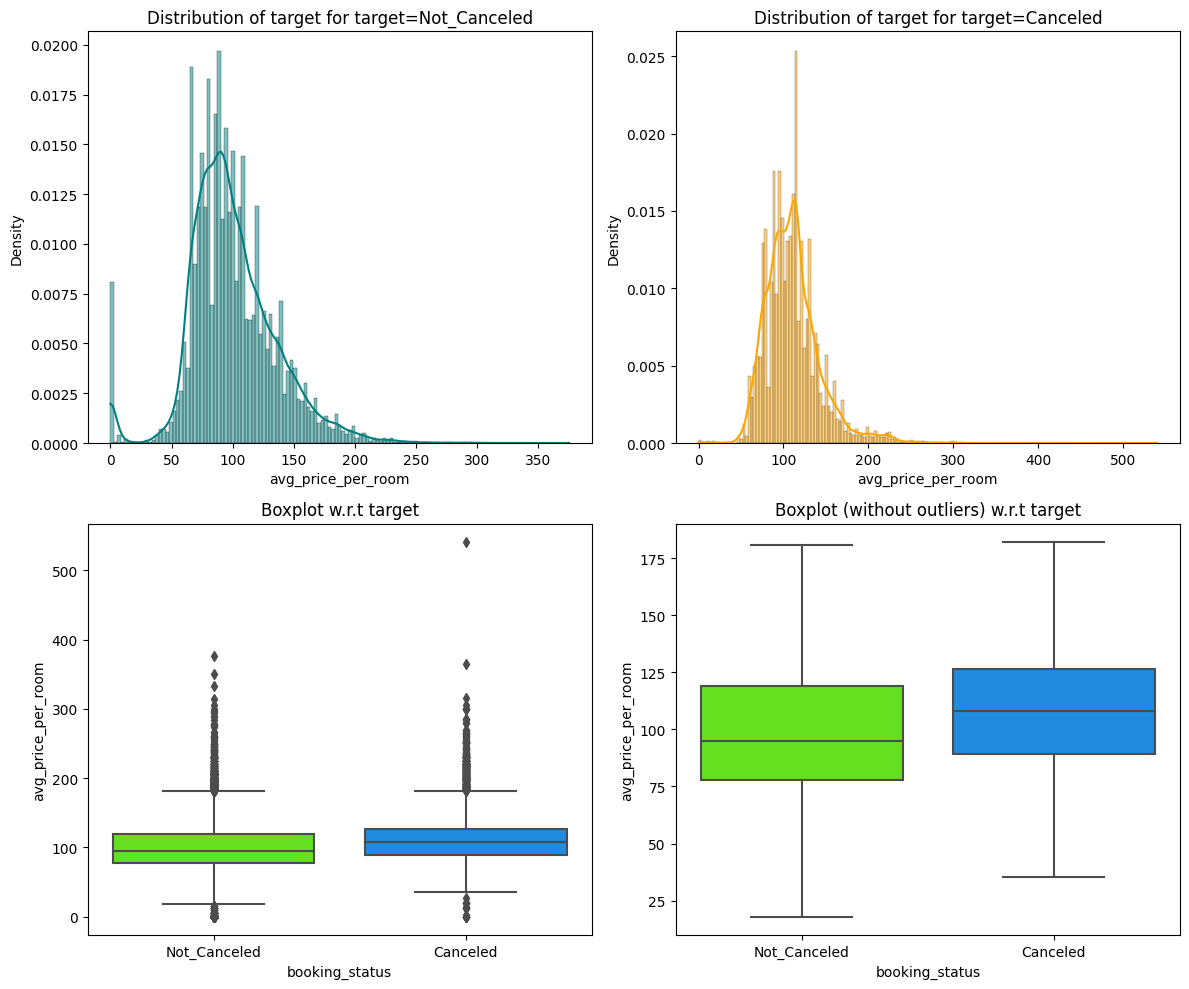

In [ ]:
 distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

- The higher the average price per room, the higher the posibility for cancellation.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


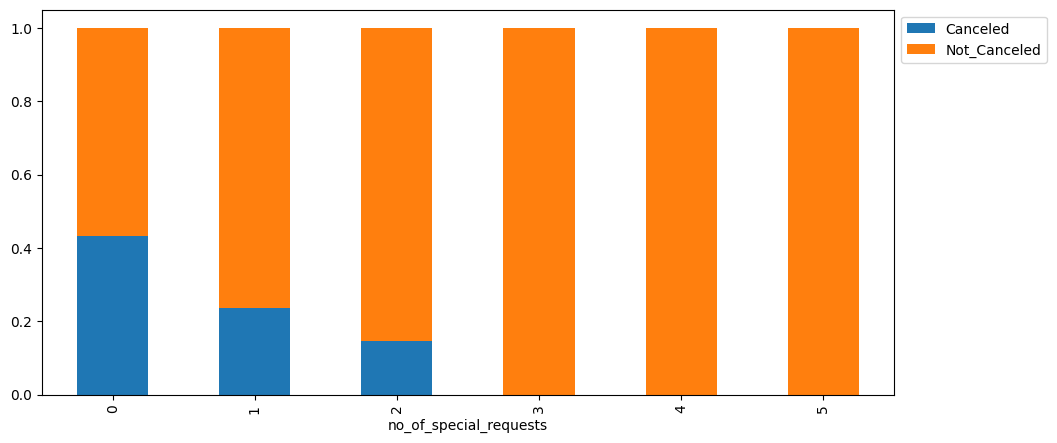

In [ ]:
 stacked_barplot(data, "no_of_special_requests", "booking_status")

- There isn't enough data to accurately compare the number of special requests and their cancellation rates, but based on the gathered information there is a tendency of higher probability of cancellation the less the special requirements.


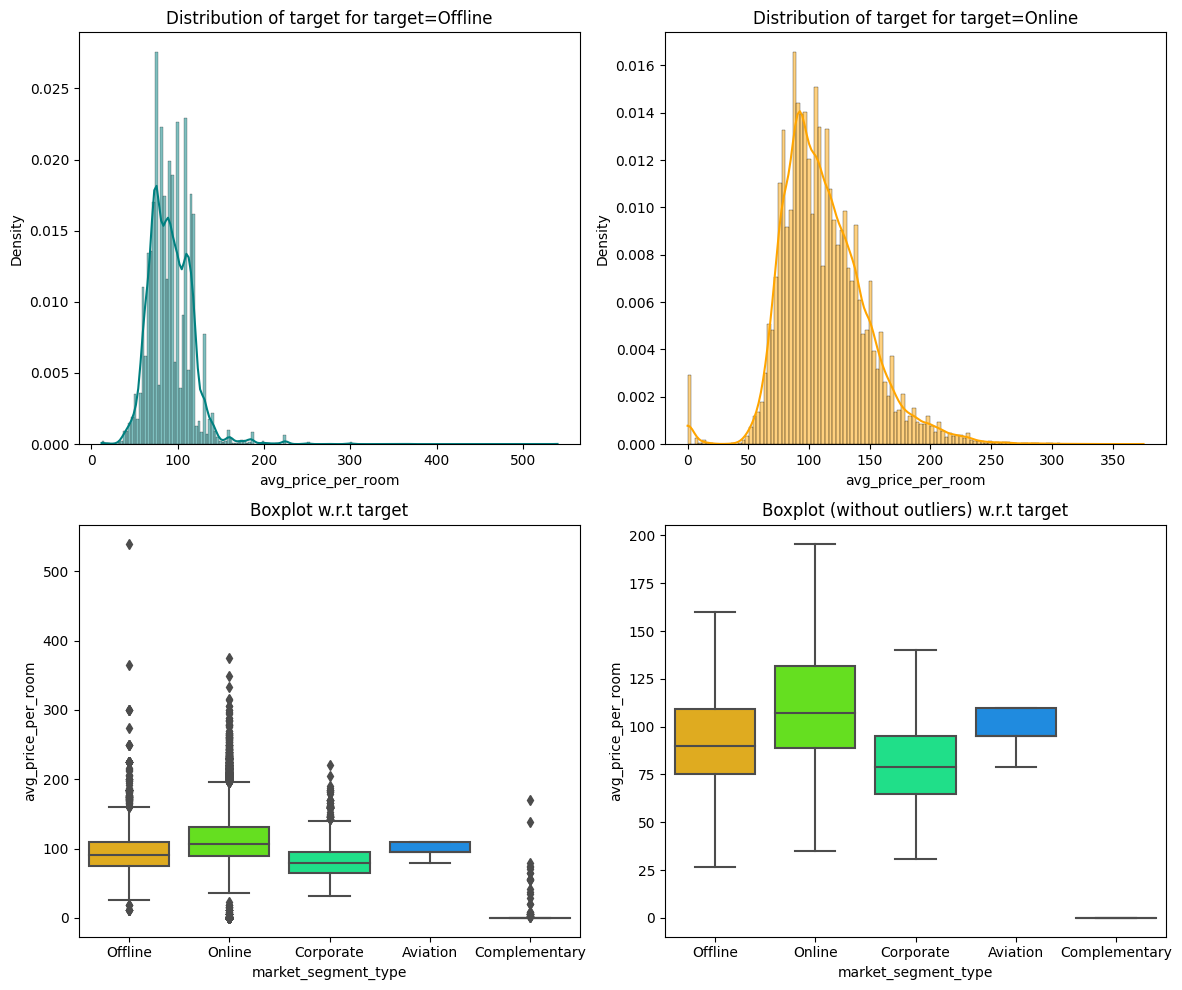

In [ ]:
 distribution_plot_wrt_target(data, "avg_price_per_room", "market_segment_type")

In [ ]:
data.groupby(['market_segment_type'])[['avg_price_per_room']].mean()

avg_price_per_room
market_segment_type                    
Aviation                      100.70400
Complementary                   3.14176
Corporate                      82.91174
Offline                        91.63268
Online                        112.25685

- Prices for customers who book online tend to be higher, with a mean price of around 112 euros per room. Aviation customers follow on second place with a mean price of around 100 euros, and offline customers with a mean of 91 euros per room.

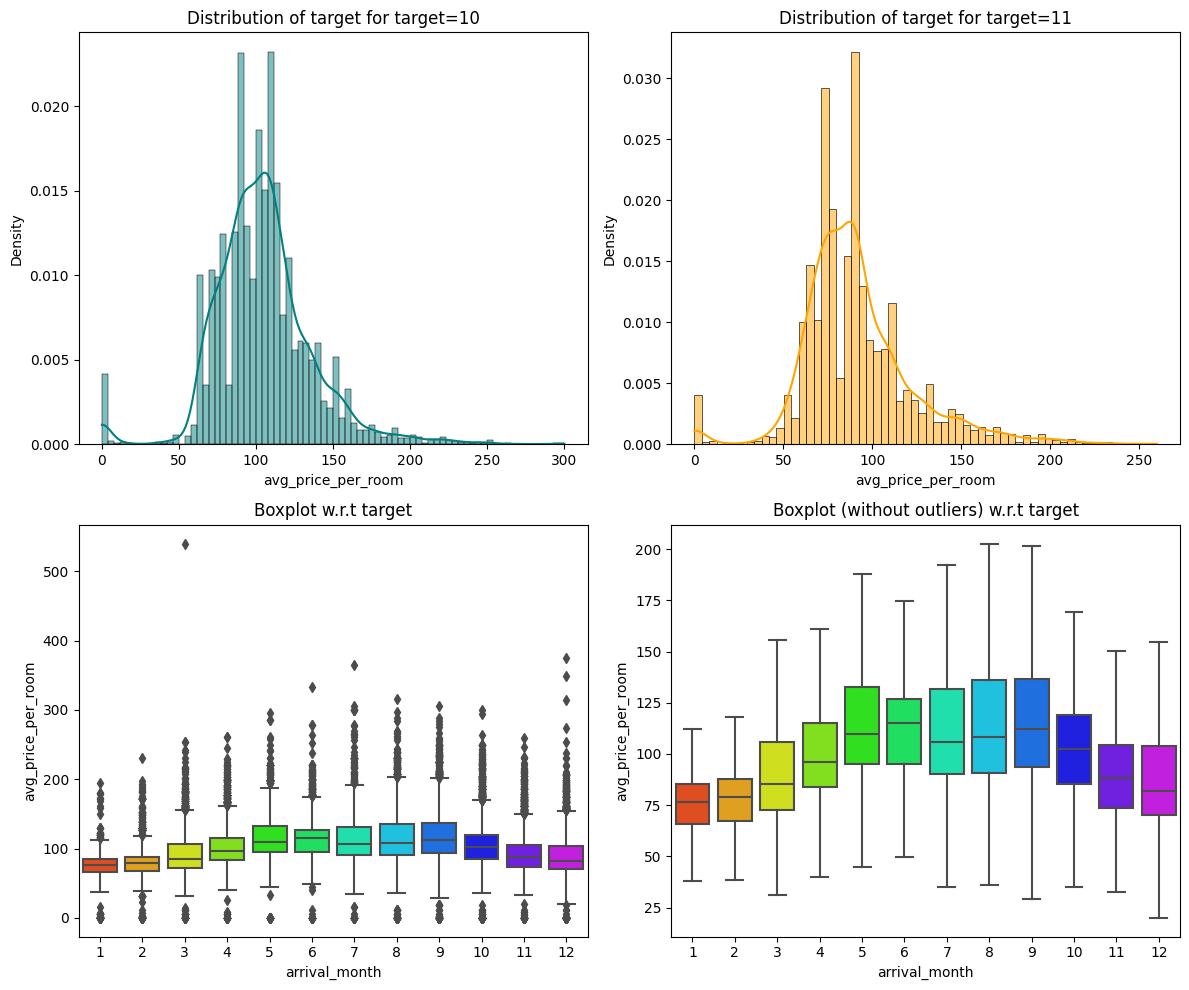

In [ ]:
 distribution_plot_wrt_target(data, "avg_price_per_room", "arrival_month")

- Prices tend to be higher during summer months (June, July, August, September), as well as for May, with median values over 100 euros per room.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# creating a list of the numerical columns for outlier detection 
num_cols = data.select_dtypes(include=np.number).columns.tolist()

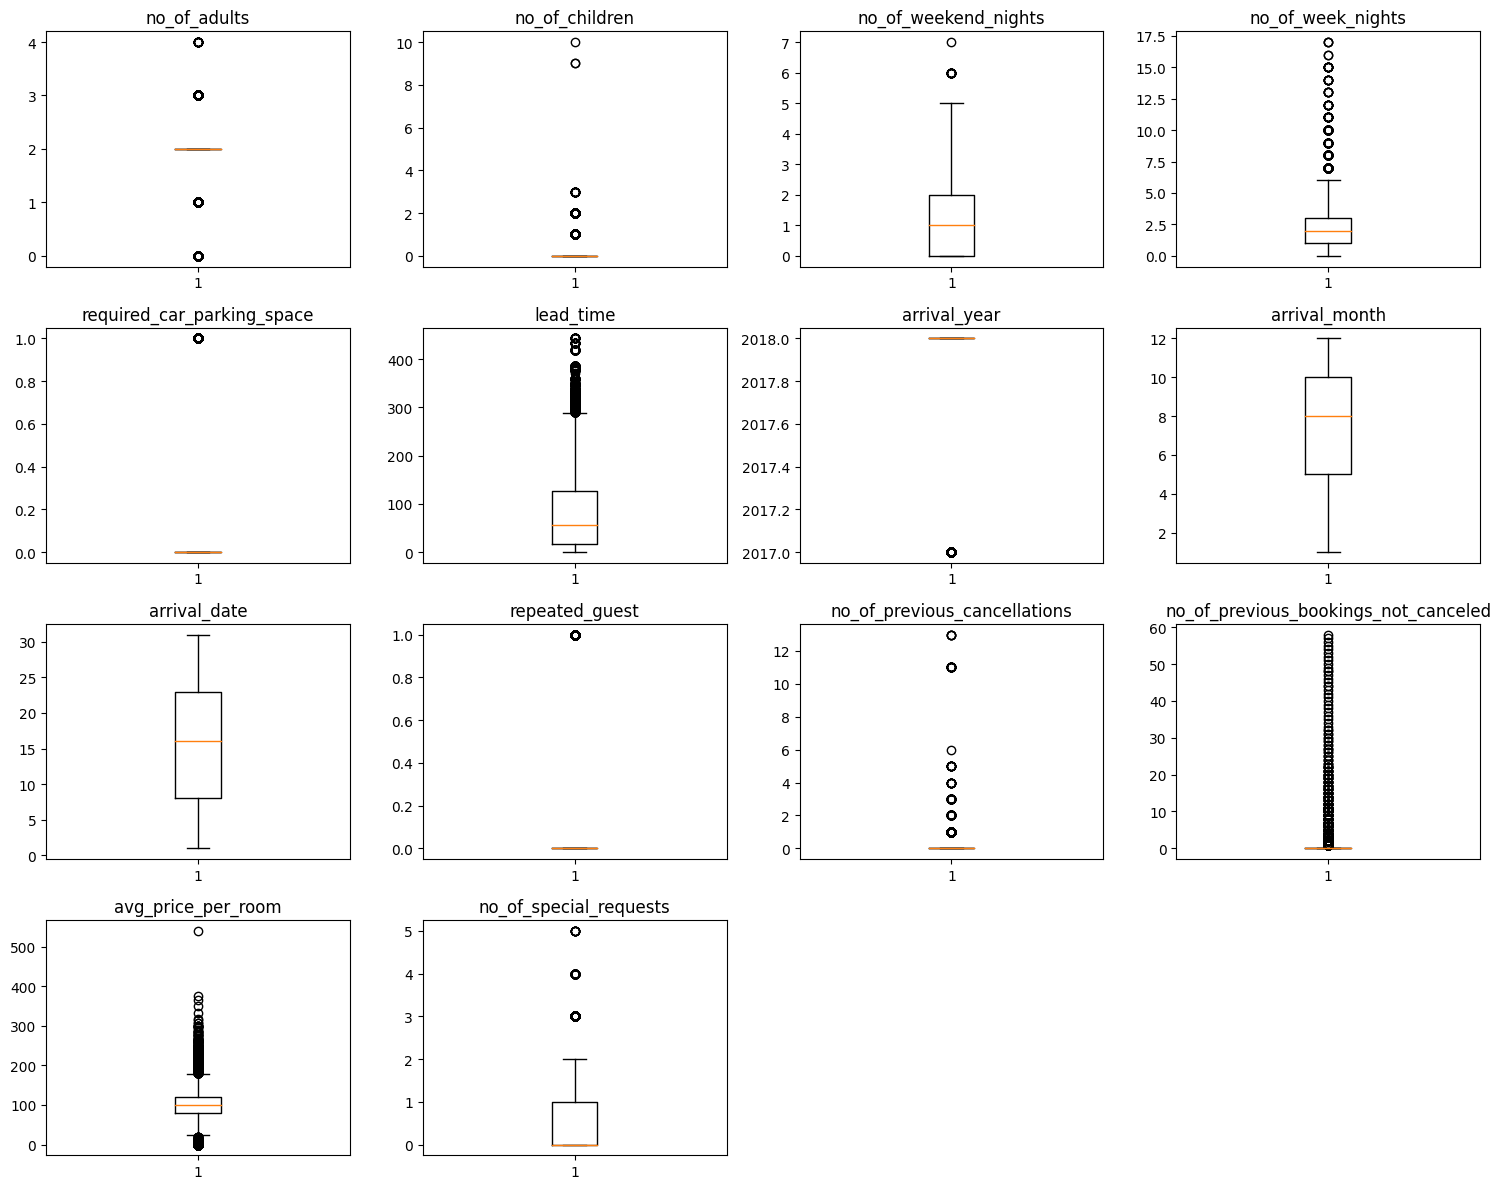

In [ ]:
# outlier detection
plt.figure(figsize=(15, 12))

# Function that looks at all numeric columns and will return boxplots for each variable and its outliers
for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers corresponding to number of adults and children seem real, as well as those corresponding to the number of week and weekend nights.
- Average price per room is the only variable that seems to have odd values.

In [ ]:
data[data["avg_price_per_room"] == 0].count()

no_of_adults                            545
no_of_children                          545
no_of_weekend_nights                    545
no_of_week_nights                       545
type_of_meal_plan                       545
required_car_parking_space              545
room_type_reserved                      545
lead_time                               545
arrival_year                            545
arrival_month                           545
arrival_date                            545
market_segment_type                     545
repeated_guest                          545
no_of_previous_cancellations            545
no_of_previous_bookings_not_canceled    545
avg_price_per_room                      545
no_of_special_requests                  545
booking_status                          545
dtype: int64

There are 545 rows with average price per room corresponding to 0, which can't be, as well as some other rows with values over 500 euros. We will deal with these using the IQR method to clip the outliers to the lower and upper whiskers.

In [ ]:
# 25th and 75th percentile
Q1 = data['avg_price_per_room'].quantile(0.25)
Q3 = data['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)
lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds
upper_whisker = Q3 + 1.5*IQR

In [ ]:
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = upper_whisker
data.loc[data["avg_price_per_room"] == 0, "avg_price_per_room"] = lower_whisker

In [ ]:
# changing values of booking status to numerical 
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
# splitting data into train test sets
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


- Around 67% of reservations on both sets were cancelled.

## EDA

- It is a good idea to explore the data once again after manipulating it.

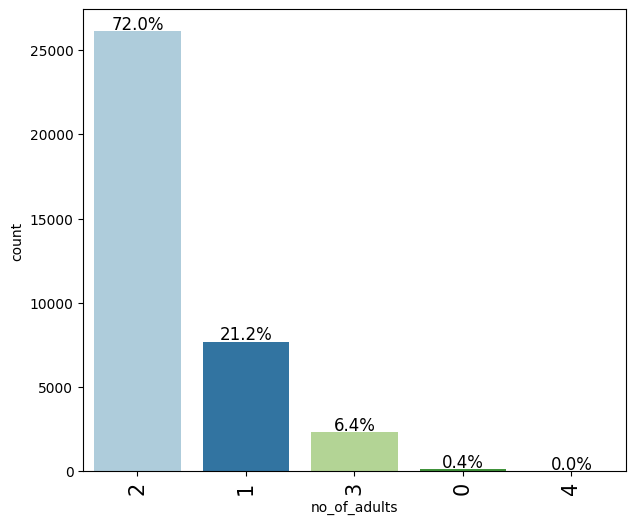

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

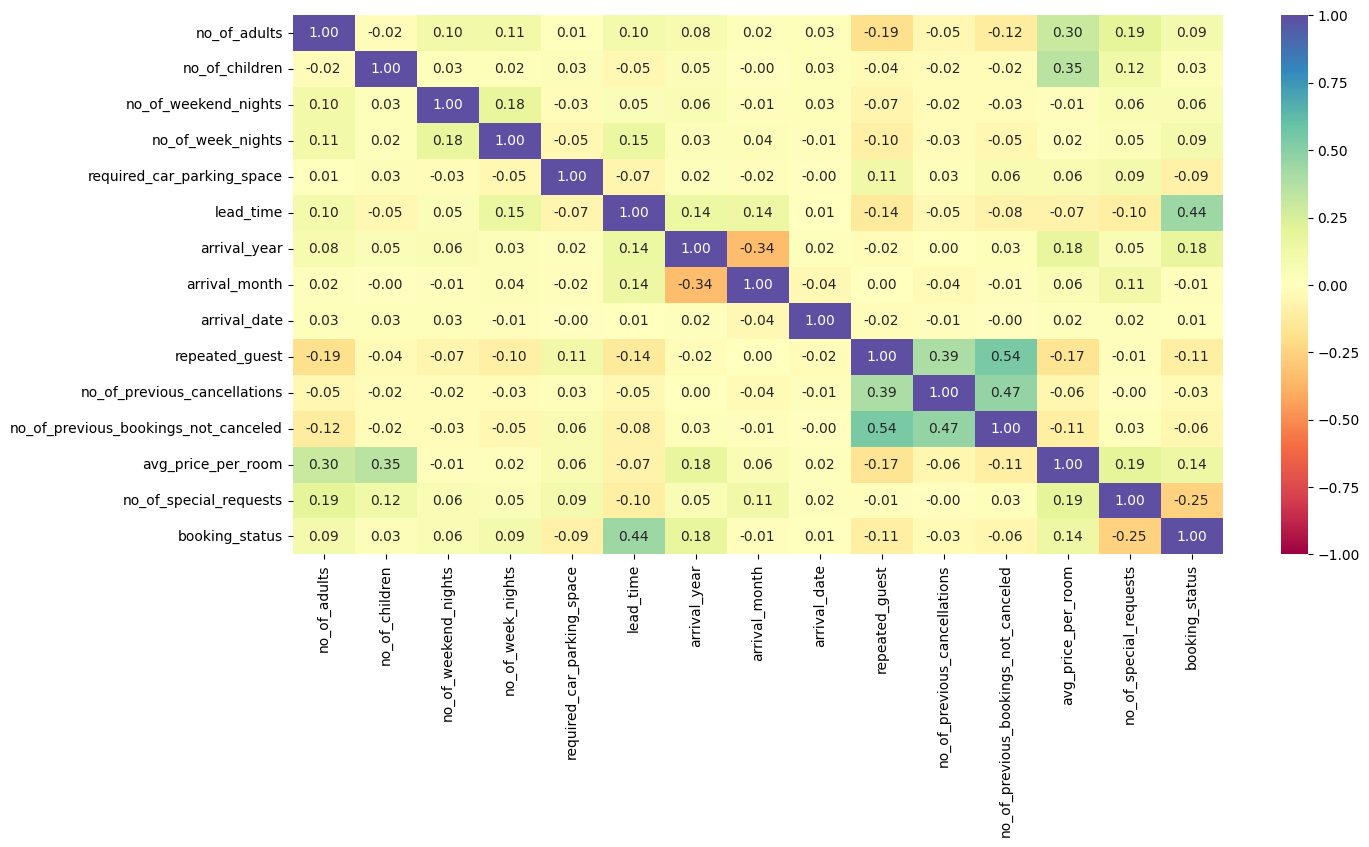

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


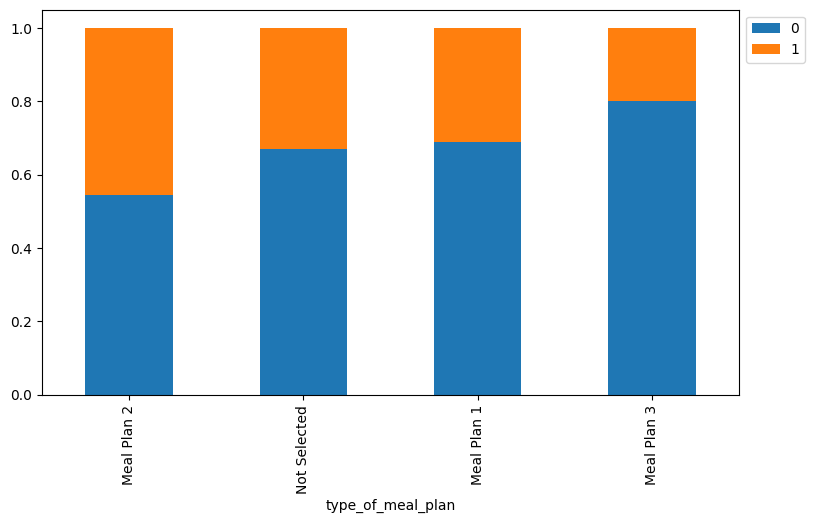

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

booking_status         0      1    All
type_of_meal_plan                     
All                24390  11885  36275
Meal Plan 1        19156   8679  27835
Not Selected        3431   1699   5130
Meal Plan 2         1799   1506   3305
Meal Plan 3            4      1      5
------------------------------------------------------------------------------------------------------------------------


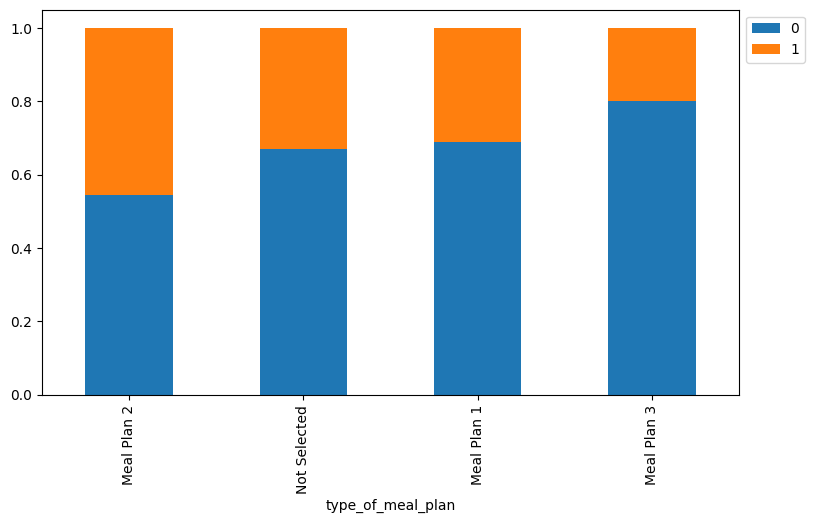

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

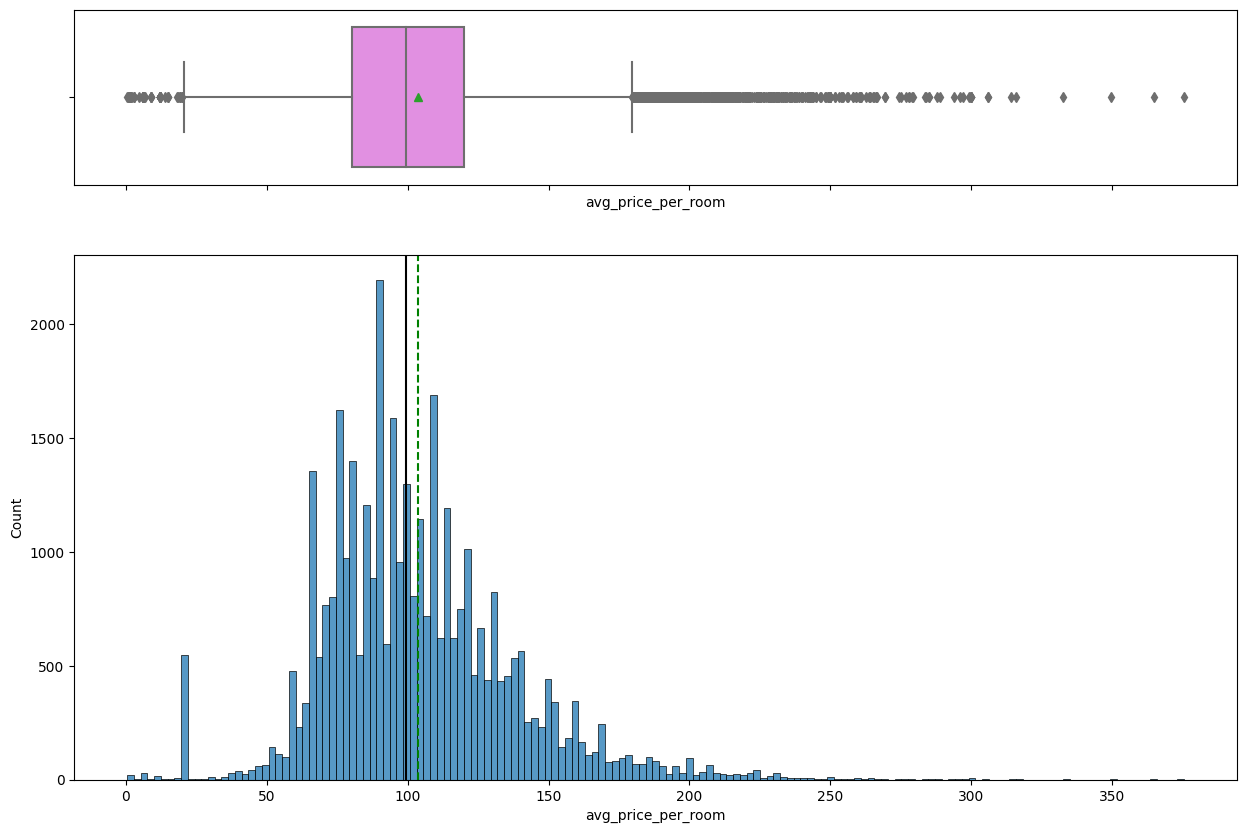

In [ ]:
 histogram_boxplot(data, "avg_price_per_room")

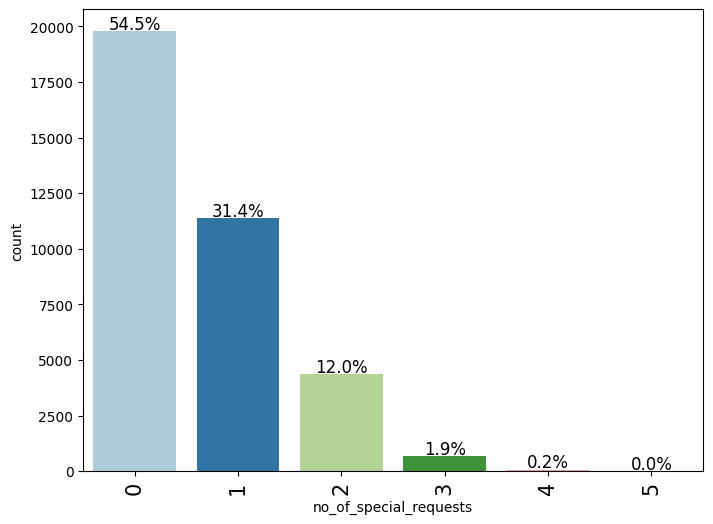

In [ ]:
 labeled_barplot(data, "no_of_special_requests", perc=True)

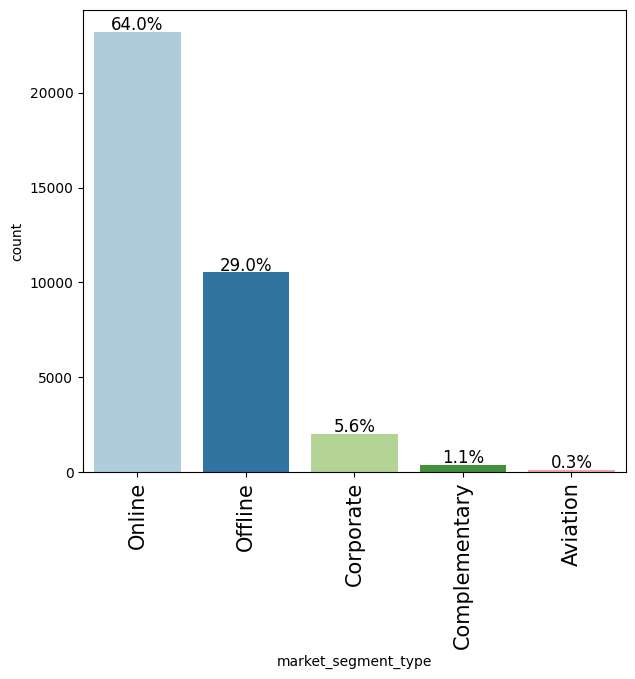

In [ ]:
 labeled_barplot(data, "market_segment_type", perc=True)

- No damage was done to the data

## Building a Logistic Regression model

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3289
Time:                        17:52:50   Log-Likelihood:                -10799.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -930.5761    120.824     -7.702      0.000   -1167.387    -693.765
no_of_adults                             0.1158      

- Negative coefficient values show that the probability of a reservation getting canceled increases with the increase of the corresponding attribute value.
- Positive coefficient values show that the probability of a reservation getting canceled decreases with the increase of the corresponding attribute value.
- p-values show the level of significance of the attribute. With a standard level of 0.05, we can conclude that any attribute with a lower p-value is considered significant and vice versa.

**Model can make wrong predictions as:**
1. Predicting a reservation will get cancelled but it doesn't.
2. Predicting a reservation will NOT get cancelled but it does.


**Which case is more important?**

Both the cases are important as:
- If the hotel predicts a reservation will get canceled, there's a chance the hotel won't be able to provide the customer with a satisfactory service, damaging the brand and its reputation.
- If the hotel predicts a reservation will NOT get canceled, there will be fund and opportunity loses.

**How to reduce this loss?**

We will need to reduce both False Negatives and False Positives by focusing on the **f1_score**. The greater the **f1_score**, the higher the chances of reducing both False Negatives and False Positives.



In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0], )
    
    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages
    
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

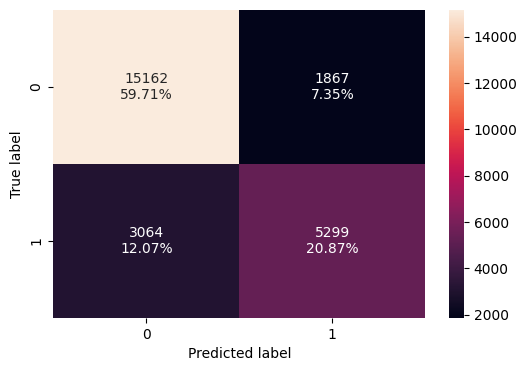

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80580 0.63362    0.73946 0.68247

- The f1_score of the model is ~0.68, which will need further maximisation if possible.
- We will check for multicollinearity.


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**General Rule of thumb for Multicollinearity:**

- If VIF is 1 then there is no multicollinearity
- If VIF exceeds 5, there is moderate multicollinearity
- If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39503492.97421
no_of_adults                                  1.34810
no_of_children                                1.97888
no_of_weekend_nights                          1.07033
no_of_week_nights                             1.09625
required_car_parking_space                    1.03992
lead_time                                     1.39717
arrival_year                                  1.43212
arrival_month                                 1.27808
arrival_date                                  1.00673
repeated_guest                                1.78361
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65196
avg_price_per_room                            2.04191
no_of_special_requests                        1.24722
type_of_meal_plan_Meal Plan 2                 1.27861
type_of_meal_plan_Meal Plan 3                 1.02520
type_of_meal_plan_Not Selected                1

In [ ]:
# creating loop to check and drop p-values over 0.05
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else: 
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                  0.3278
Time:                        17:58:38   Log-Likelihood:                -10817.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -923.7655    120.447     -7.669      0.000   -1159.838    -687.693
no_of_adults                       0.1113      0.037      2.986      0.

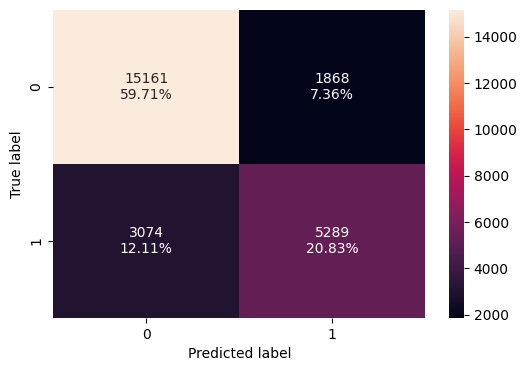

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80537 0.63243    0.73900 0.68157

- The f1_score of the model went down by 0.0009. The rest of the metrics also went down by a bit.

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11769         1.16507               1.11572   
Change_odd% -100.00000      11.76886        16.50749              11.57176   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04330                     0.20307    1.01584   
Change_odd%            4.33049                   -79.69285    1.58352   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57828        0.95820         0.06442   
Change_odd%      57.82795       -4.17966       -93.55754   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25802             1.01945   
Change_odd%                      25.80220             1.94491   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.23022                        1.17417   
Change_odd%               -76.97847                       17.41684   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33616                         0.70213   
Change_odd%                        33.61561                       -29.78737   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75328                         0.47767   
Change_odd%                       -24.67177                       -52.23259   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.37881                         0.23624   
Change_odd%                       -62.11915                       -76.37646   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45625                      0.16890  
Change_odd%                      -54.37539                    -83.11043

**Coefficient interpretations**

- no_of_adults : Holding all other features constant a 1 unit change in number of adults will increase the odds of a reservation getting cancelled by ~1.11 times or a ~11.7% increase in the odds.
- no_of_children : Holding all other features constant a 1 unit change in the number of children will increase the odds of a reservation getting cancelled by ~1.16 times or a increase of ~16.5% decrease in the odds.
- no_of_weekend_nights : Holding all other features constant a 1 unit change in the number of weekend nights will increase the odds of a reservation getting cancelled by ~1.11 times or a increase of ~11.5% decrease in the odds.
- repeated_guest : The odds of a reservation getting cancelled by a repeated guest decreases by 93.5% 

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) 
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80537 0.63243    0.73900 0.68157

In [ ]:
print("Test performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) 
log_reg_model_test_perf

Test performance:


Accuracy  Recall  Precision      F1
0   0.80437 0.62976    0.72889 0.67570

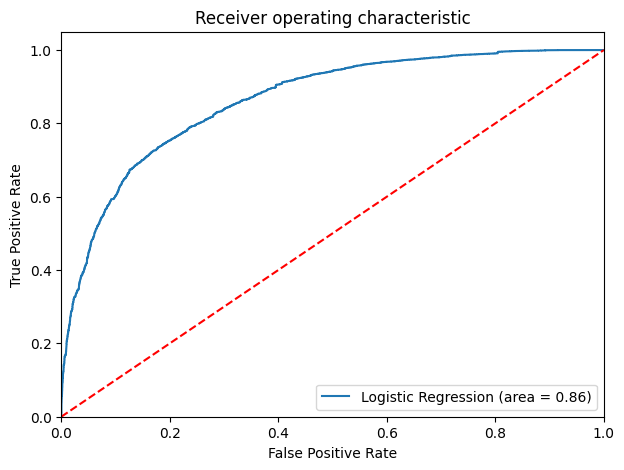

In [ ]:
# Model Performance Improvement by ROC Curve and ROC-AUC
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Model is giving a good performance on training set

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37052491957533323


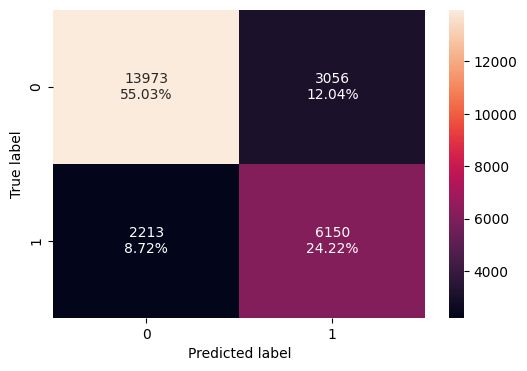

In [ ]:
# confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance on this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79249 0.73538    0.66804 0.70010

In [ ]:
# checking model performance on this model for test set
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79601 0.73907    0.66675 0.70105

- Accuracy and precision went down a little but Recall and F1 went up.

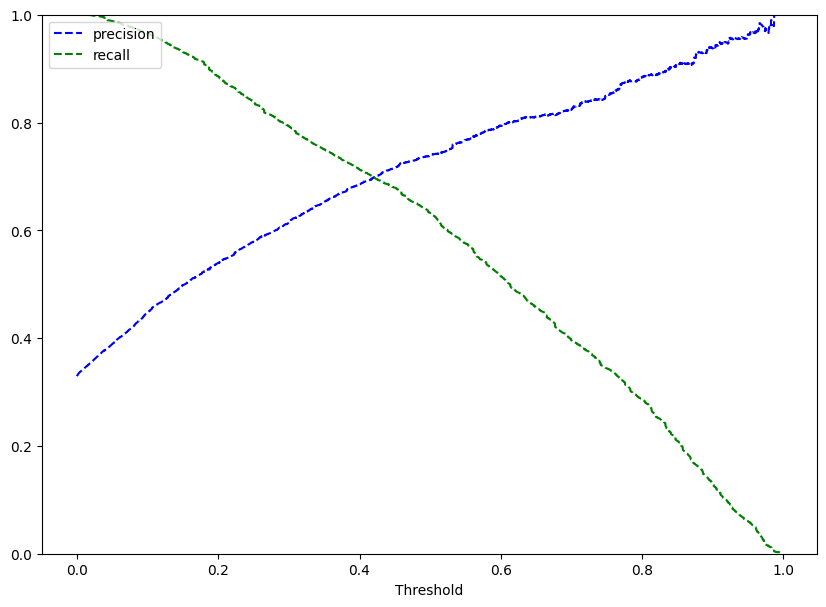

In [ ]:
# using Precision-Recall curve to find a better fit (threshold)
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At  around 0.43, we get balanced recall and precision.

In [ ]:
# setting new threshold
optimal_threshold_curve = 0.43

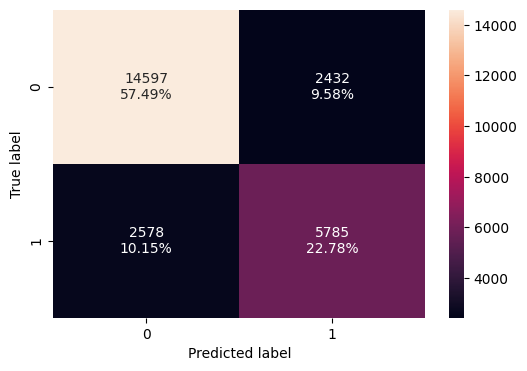

In [ ]:
# confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80269 0.69174    0.70403 0.69783

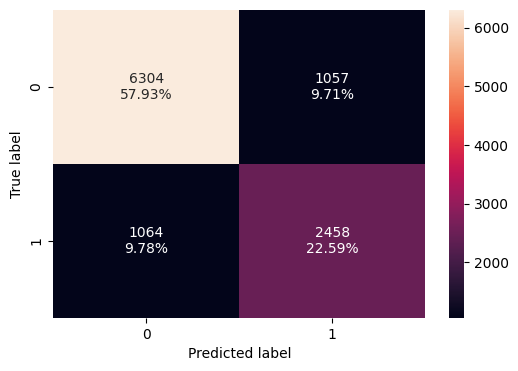

In [ ]:
# confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80511 0.69790    0.69929 0.69859

- F1 score and Recall went down, while the rest went up.

## Model performance evaluation

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
],
axis=1, )
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.43 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80537   
Recall                                         0.63243   
Precision                                      0.73900   
F1                                             0.68157   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79249   
Recall                                0.73538   
Precision                             0.66804   
F1                                    0.70010   

           Logistic Regression-0.43 Threshold  
Accuracy                              0.80269  
Recall                                0.69174  
Precision                             0.70403  
F1                                    0.69783

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
],
axis=1, )
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.43 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80437   
Recall                                         0.62976   
Precision                                      0.72889   
F1                                             0.67570   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79601   
Recall                                0.73907   
Precision                             0.66675   
F1                                    0.70105   

           Logistic Regression-0.43 Threshold  
Accuracy                              0.80511  
Recall                                0.69790  
Precision                             0.69929  
F1                                    0.69859

- All the three models are performing well on both training and test data without ooverfitting
- The model with a threshold of 0.37 is giving the best F1 score. Will be selected as the final model

## Building a Decision Tree model

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

- Our target is to maximise the F1-score.

In [ ]:
# defining a function to compute different metrics to check performance of a sklearn classification model 
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance


    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0], )
    
    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

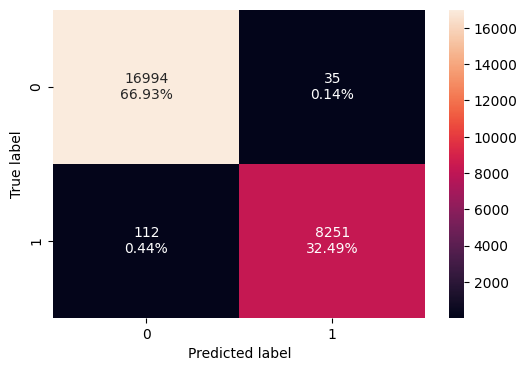

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

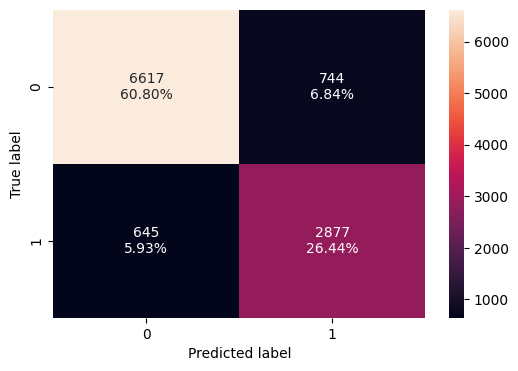

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy  Recall  Precision      F1
0   0.87237 0.81687    0.79453 0.80554

In [ ]:
# we will use class_weight parameter to unbias the tree due to different class frequencies 
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

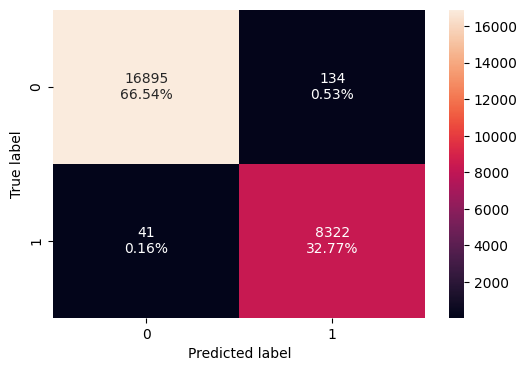

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99311 0.99510    0.98415 0.98960

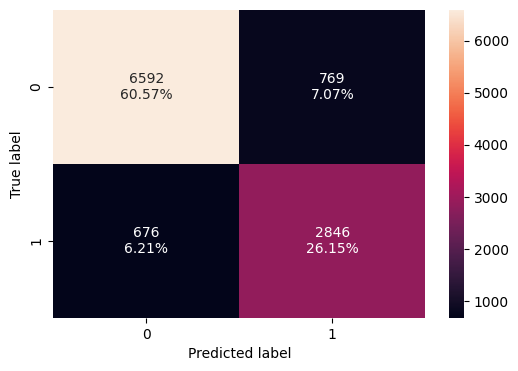

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.86722 0.80806    0.78728 0.79753

- The model is a little overfitting.

## Do we need to prune the tree?

**Pre-Pruning**

In [ ]:
# Using GridSearch for Hyperparameter tuning
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

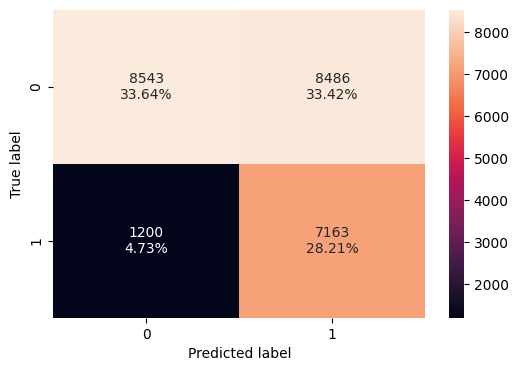

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.61854 0.85651    0.45773 0.59662

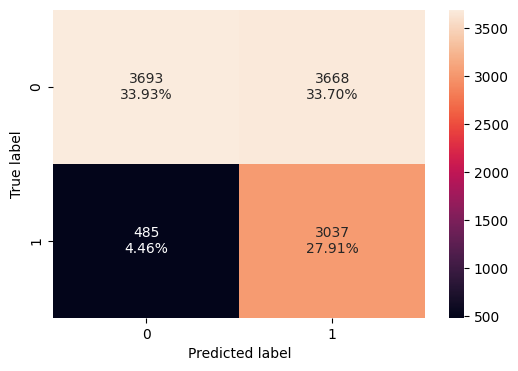

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test


Accuracy  Recall  Precision      F1
0   0.61840 0.86229    0.45295 0.59392

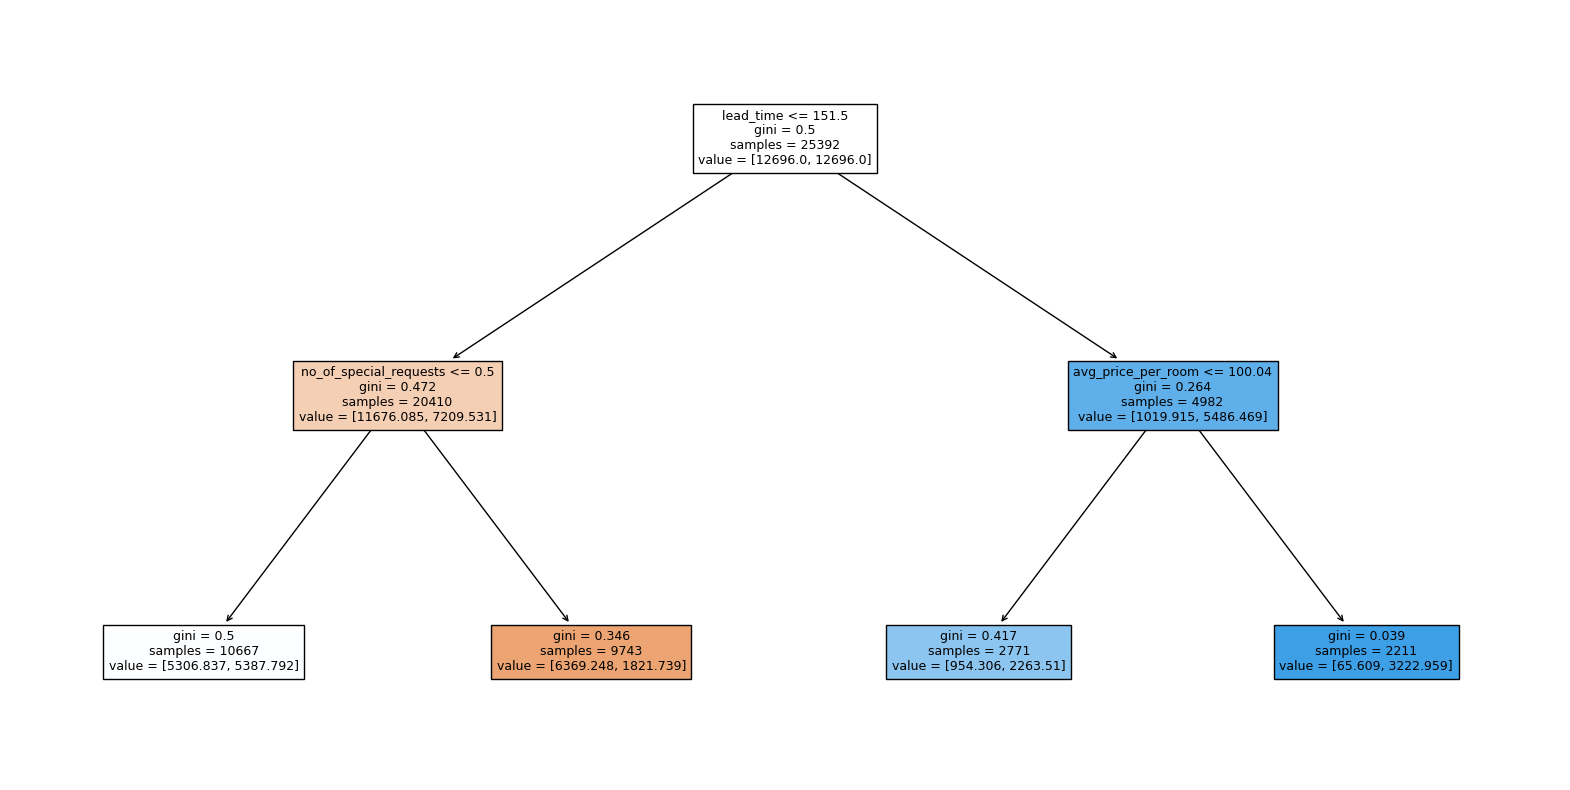

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
 # Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1



Using the above extracted decision rules we can make interpretations from the decision tree model like:
- If the lead time is less than or equal to 151.5, the number of special requests is less than or equal to .5, then reservation is most likey to get cancelled.


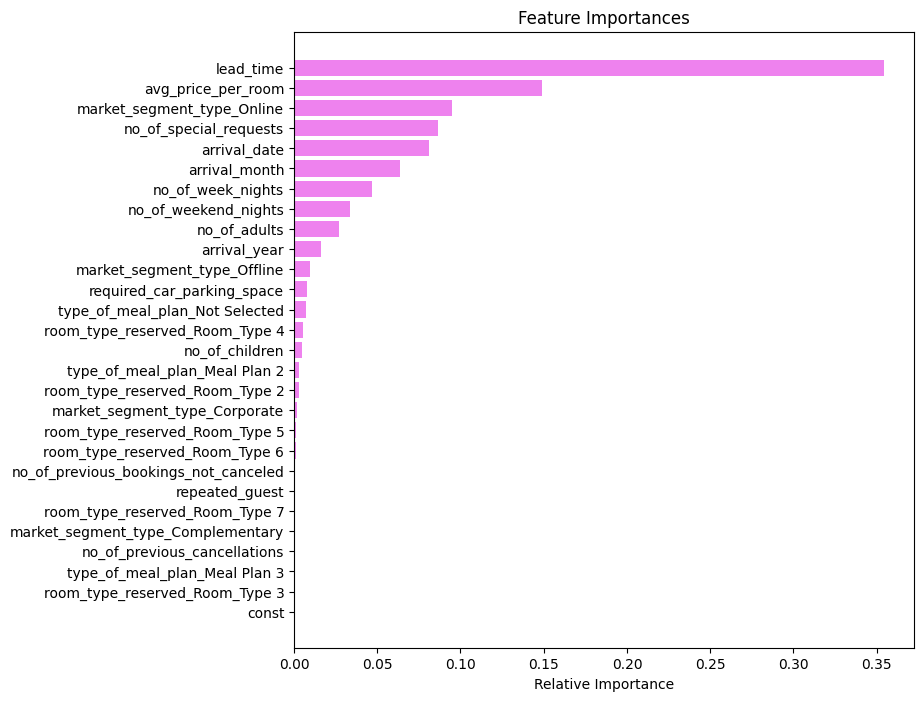

In [ ]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Top most important features:
- lead time
- average price per room
- market segment

**Post-Pruning**

In [ ]:
# Total impurity of leaves vs effective alphas of pruned tree
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1828     0.00890     0.32806
1829     0.00980     0.33786
1830     0.01272     0.35058
1831     0.03412     0.41882
1832     0.08118     0.50000

[1833 rows x 2 columns]

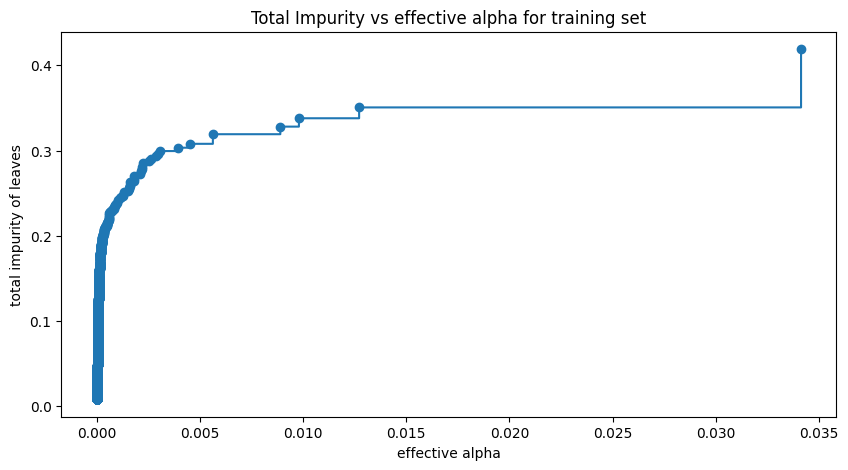

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# training a decision tree using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136921


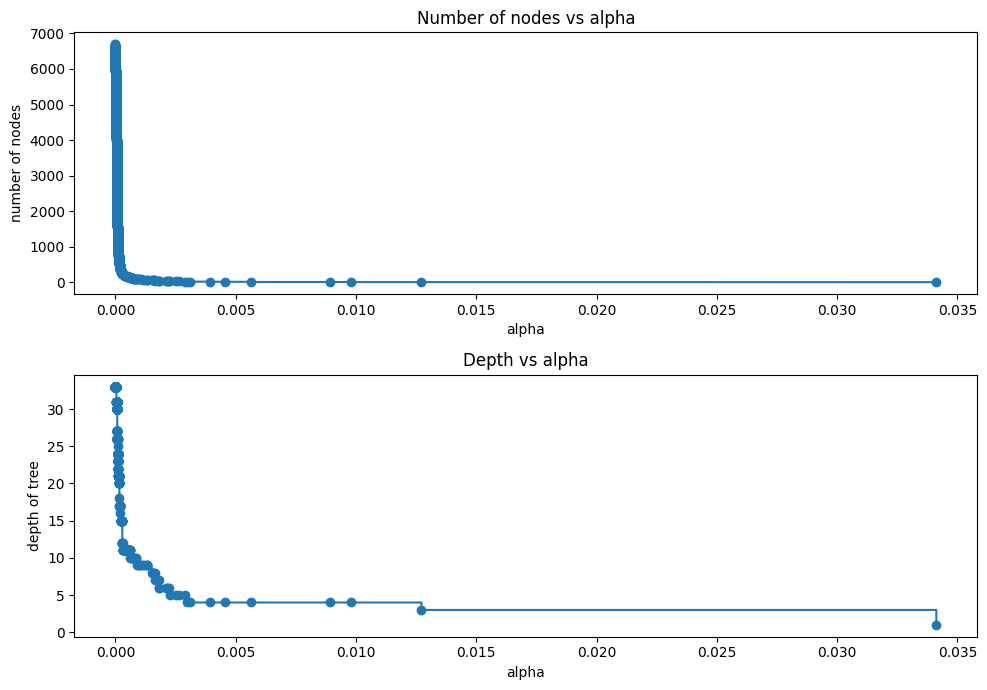

In [ ]:
# removing the last element in clfs and ccp_alphas
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
# maximising f1
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

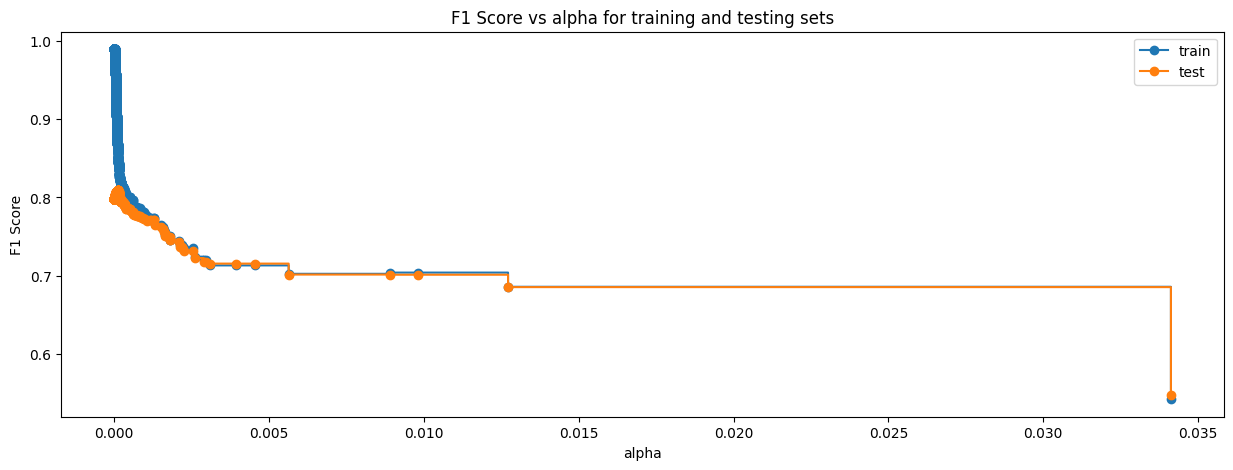

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test f1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167002,
                       class_weight='balanced', random_state=1)


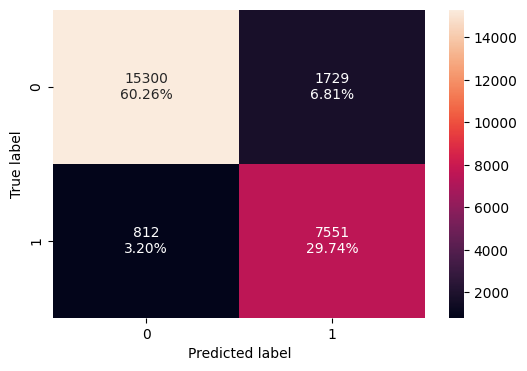

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89993 0.90291    0.81369 0.85598

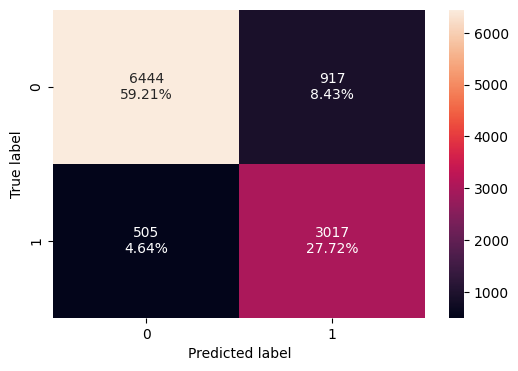

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86934 0.85662    0.76690 0.80928


- The post-pruned tree model has drastically improved, with the F1-score now at ~0.8 for both training and test sets.

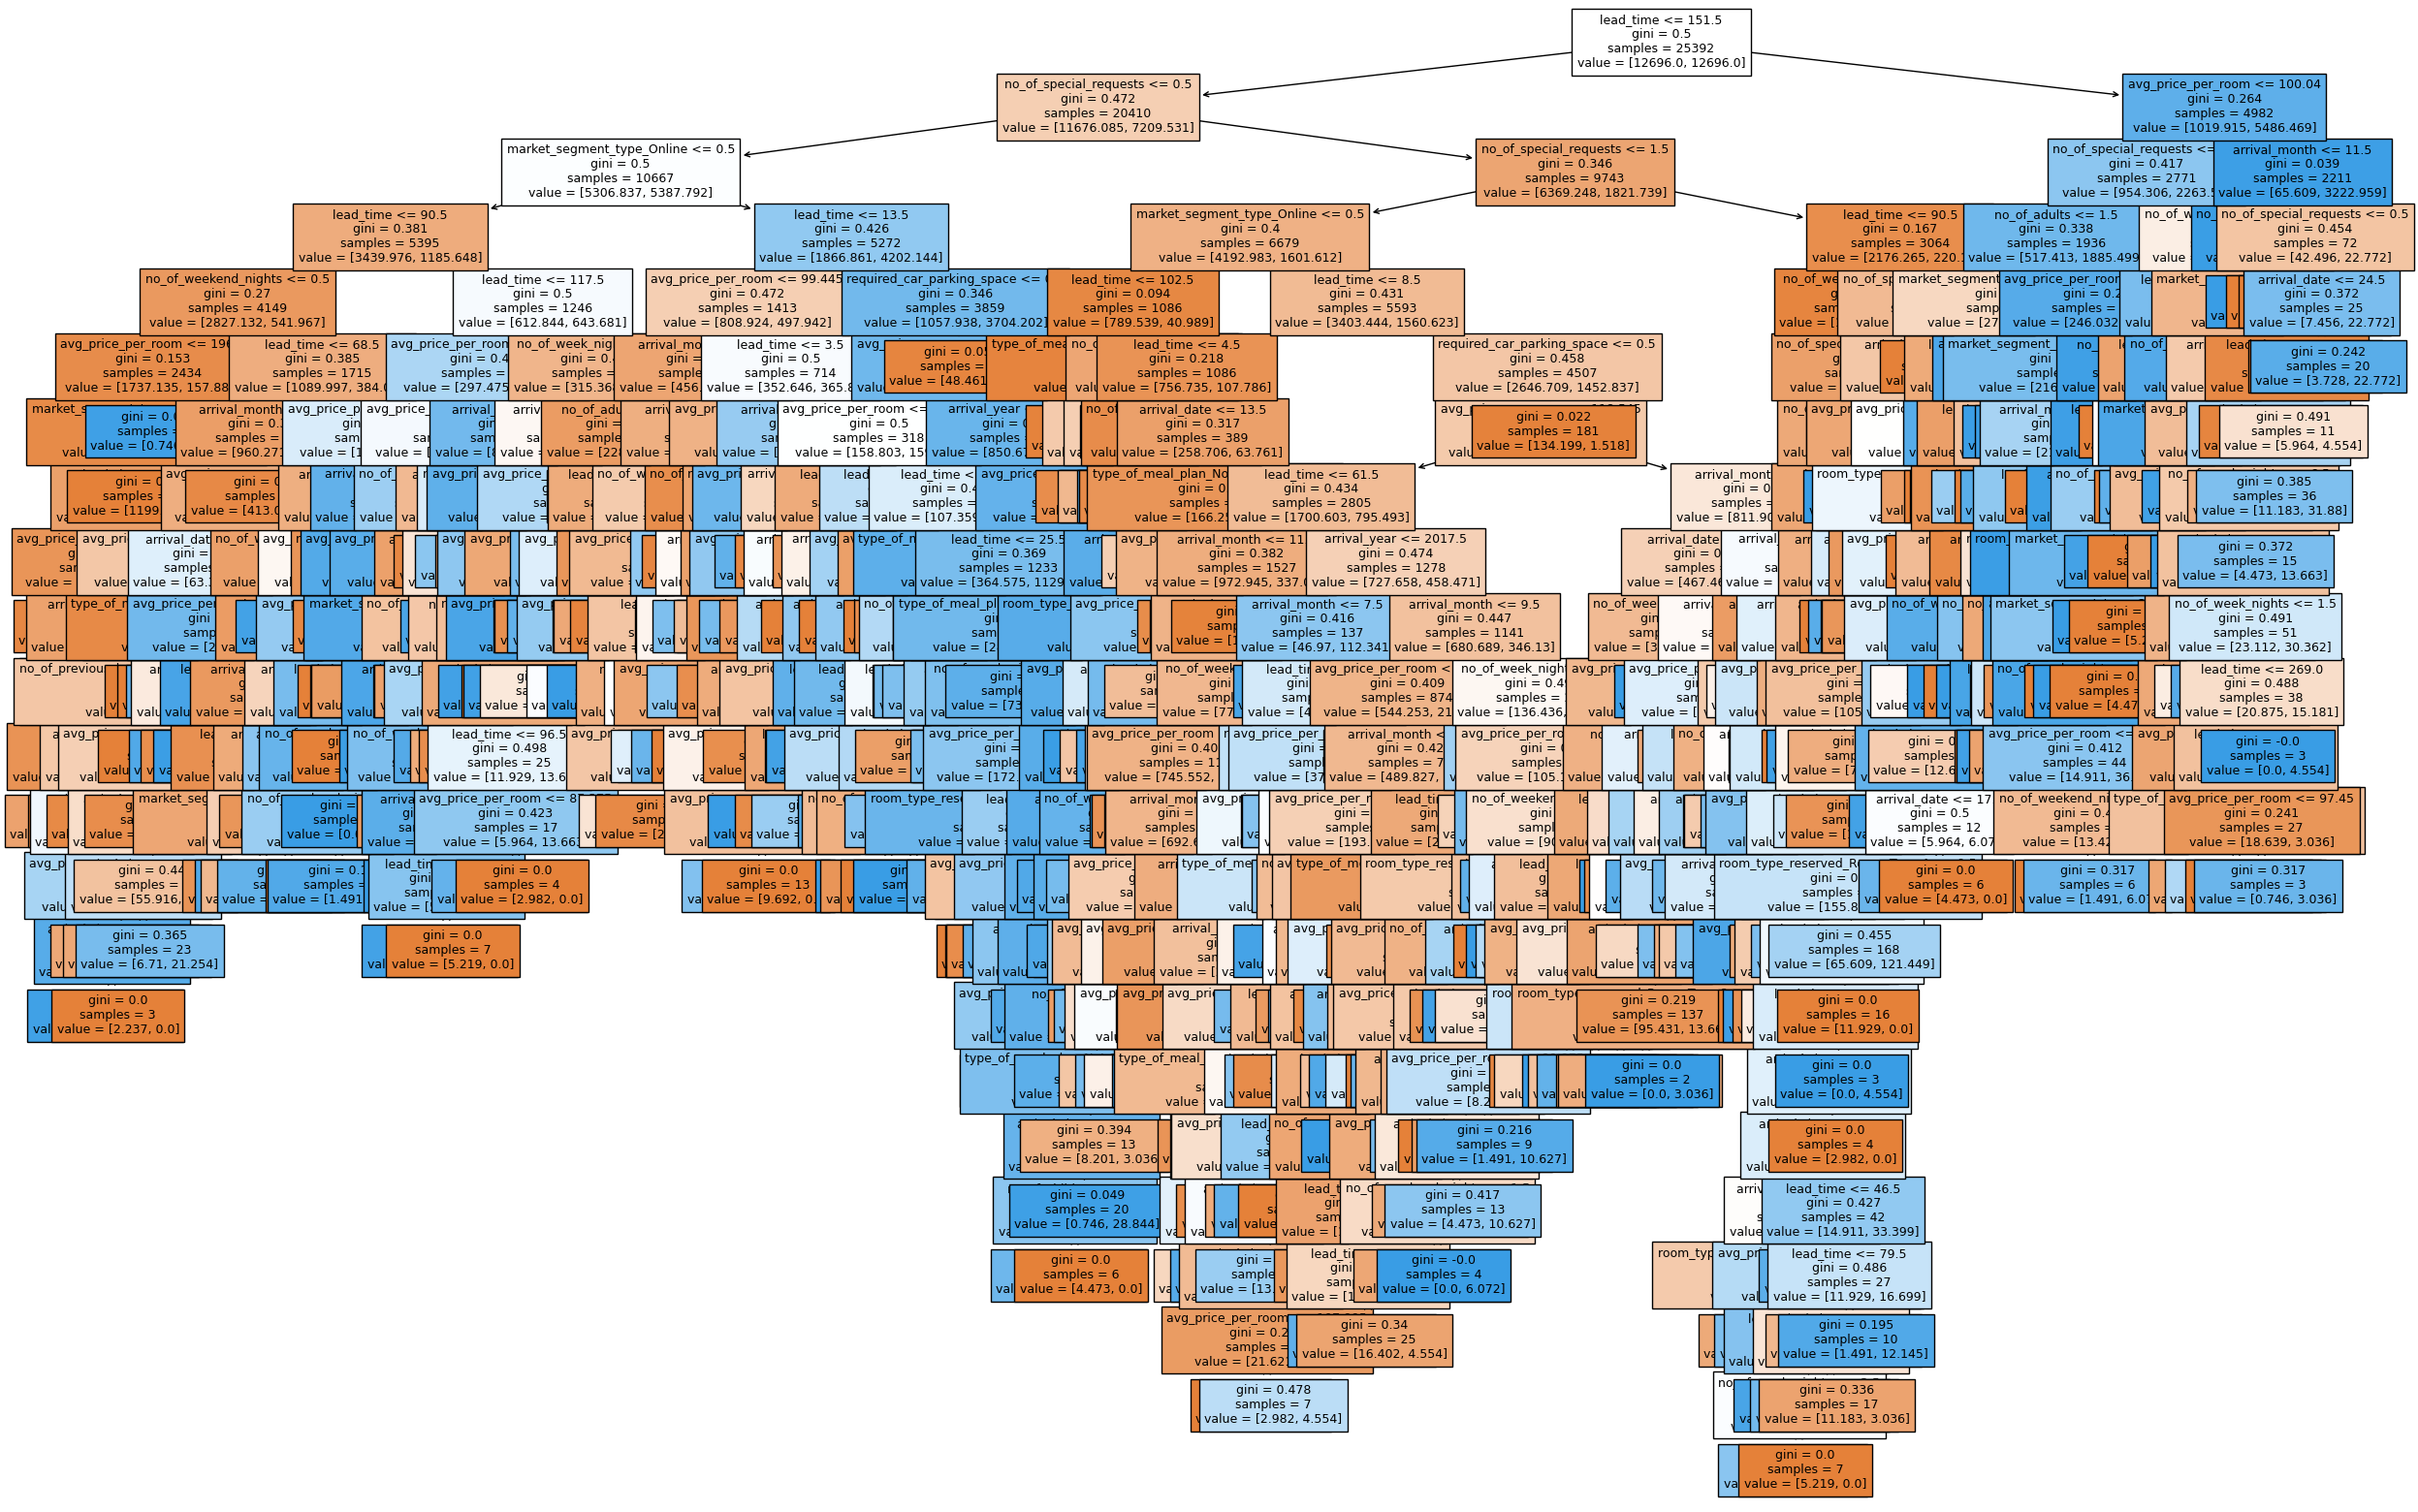

In [ ]:
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

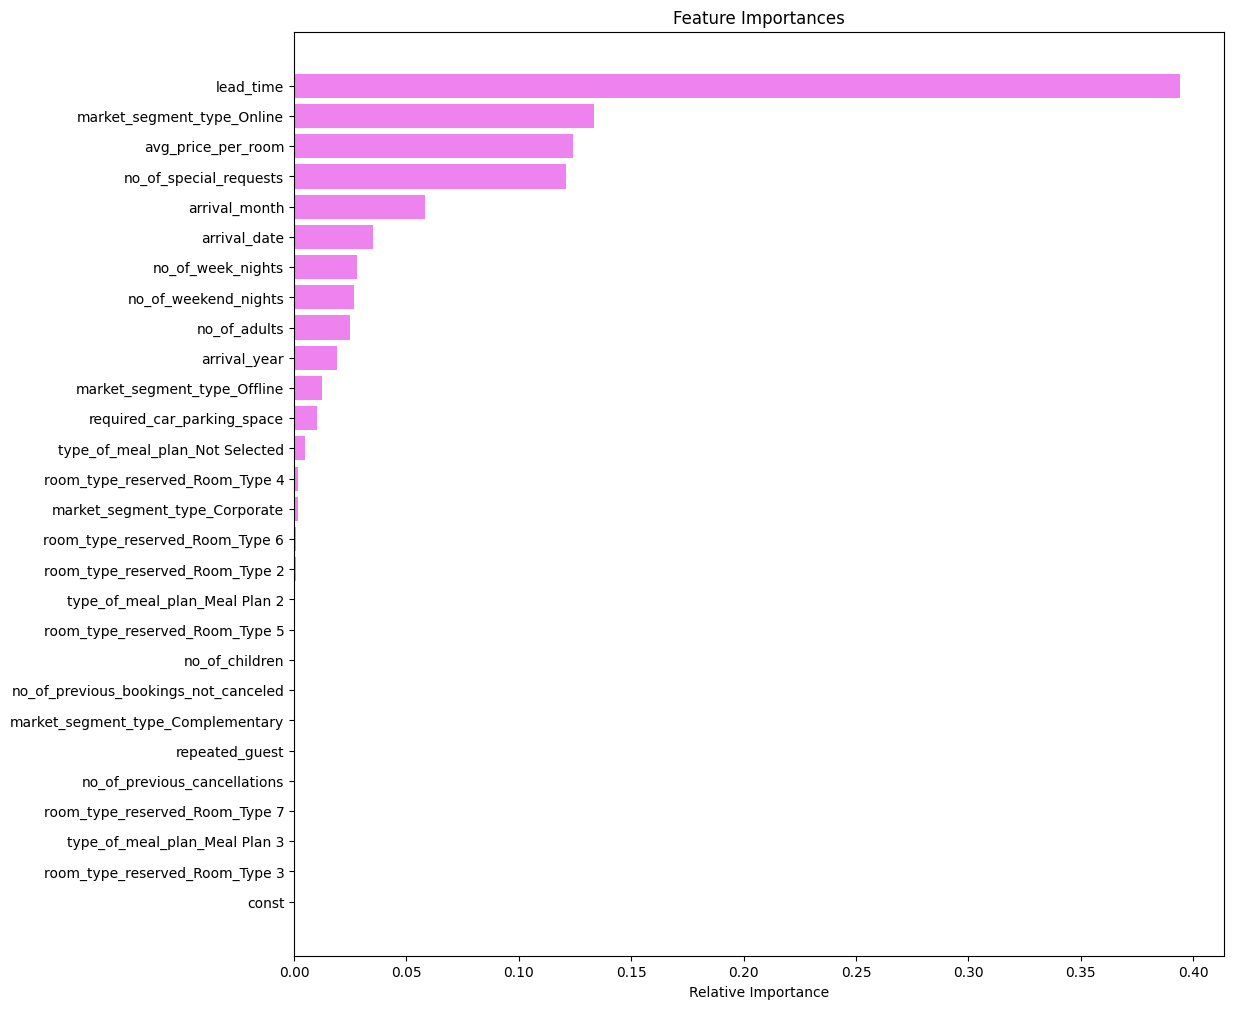

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


-  Top most important features remain the same for the post-pruned tree.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
],
axis=1, )
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.99421   
Recall                                0.98661   
Precision                             0.99578   
F1                                    0.99117   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.99311                      0.61854   
Recall                             0.99510                      0.85651   
Precision                          0.98415                      0.45773   
F1                                 0.98960                      0.59662   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89993  
Recall                          0.90291  
Precision                       0.81369  
F1                              0.85598

In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
],
axis=1, )
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                              0.87237   
Recall                                0.81687   
Precision                             0.79453   
F1                                    0.80554   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.86722                      0.61840   
Recall                             0.80806                      0.86229   
Precision                          0.78728                      0.45295   
F1                                 0.79753                      0.59392   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86934  
Recall                          0.85662  
Precision                       0.76690  
F1                              0.80928


- Decision tree with sklearn is overfitted, and arranging the class weight did not have a significant impact. Overall, the Post-pruning tree is the best model, having the highest f1-score and not being overfitted. It also is the model with the best results on the test set.



##Important Observations
- People tend to book hotel reservations more often during the months of August(10.5%), September(12.7%) and October(14.7%).
- January and February are the least occupied months of the year, with 2.8% and 4.7% of reservations made during these months respectively.
- 64% of reservations come from online clients, followed by 29% coming from walk-ins, 5.6% corresponding to corporate, 1.1% are complementary, and 0.3% from aviation crew.
- Prices for customers who book online tend to be higher, with a mean price of around 112 euros per room. Aviation customers follow on second place with a mean price of around 100 euros, and offline customers with a mean of 91 euros per room.
- 32.8% of reservations were cancelled.
- There are a total of 930 repeated guests, from which only 16 (~1.7%) cancelled.
- There isn't enough data to accurately compare the number of special requests and their cancellation rates, but based on the gathered information there is a tendency of higher probability of cancellation the less the special requirements.


## Actionable Insights and Recommendations

- The model was built to predict if a reservation at INN Hotels will be canceled or not and can correctly identify 89.9% of the cancelations
- Lead time is by far the most important variable in predicting whether a reservation will be canceled or not. The following important variables are the market segment, the average price per room, and the number of special requests.
- Based on the importance of lead time, the hotel should include an additional non-refundable cost for reservations over 150 days apart from their arrival date. This way, clients will feel more compromised with their booking, and in case of cancellation, the hotel will be able to keep the additional fee.
- Reservations made within 1 week of arrival should be non-refundable.
- An additional cost could be added at the moment of booking by providing the option of flexible dates, allowing the client to change their reservation dates within a certain time range.
- Non-refundable policies could be included in offers exclusively for online reservations.
- A non-refundable booking option could include a free meal per person.


In [ ]:
%%shell
jupyter nbconvert --to html ///content/Learner_Notebook_Full_code_version.ipynb